DECEMBER 14, 2024
PES UNIVERSITY
E-CITY CAMPUS, BANGALORE

1.	Title of Project
House Price Prediction applying Machine Learning Models in India Markets

2.	Problem Statement
The primary problem addressed in this project is the challenge of determining optimal pricing strategies for real estate properties in India. In the case of real estate agents, they try in most cases to provide reasonable competitive prices that would facilitate sales or rental proposal without having properties remain on the market for an unduly long period of time, and therefore, avoid potential revenue loss.

3.	Objective of Project
To determine the Price of certain real estate product at certain location based on certain influencing factors.
To propose the ML Model that helps predicting near precise proposal of Price for investors to maximize the value based on different features of the property such as Location, Amenities, Property type and property status and many more.


In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.spatial import distance

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import openpyxl


In [2]:

# Specify the file path
base_path = os.getcwd()  # Current file directory
file_path = os.path.join(base_path, 'artifacts', 'properties.csv')

#file_path = '../artifacts/properties.csv'

# Specify the fields (columns) you want to read
# columns_to_read = ['Possession Status','Floor No','Developer','Units Available','Flooring Type','Covered Area','Sqft Price','Carpet Area','Area Name']
                   # 'Society','Furnished Type','Bathroom','Facing','Transaction Type','Type of Property','City','Bedroom','Floors','Luxury Flat',
                   # 'IsPrimeLocation','Balconies','Rera']

#reading the given dataset from the csv file
# df = pd.read_csv(file_path, usecols=columns_to_read)
df = pd.read_csv(file_path)
df.head()

,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Project Name,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
0,Under Construction,5,NaN,1.0,3150000.0,Vitrified,No/Rare Powercut,Kalyan West Bapgaon,635.0,NaN,...,1,1,1,1,1,1,1,1,1,1
1,Ready to Move,20,TATA Housing Development Company Ltd.,10.0,6300000.0,Vitrified,No/Rare Powercut,Rajoli naka,579.0,Tata Amantra,...,1,1,1,1,1,1,1,1,1,1
2,Ready to Move,18,Sai Satyam Developers,0.0,5400000.0,Vitrified,No/Rare Powercut,This property has reputed scholl ints vicinity.,850.0,Sai Satyam Homes,...,1,1,1,1,1,1,1,1,1,1
3,Under Construction,5,Birla Estates,70.0,9000000.0,Vitrified,No/Rare Powercut,Shahad is one of the attractive locations to o...,1050.0,Birla Vanya,...,1,1,1,1,1,1,1,1,1,1
4,Under Construction,8,Godrej Properties,NaN,4950000.0,NaN,NaN,majiwada metro station,561.0,Godrej Nirvaan,...,1,1,1,1,1,1,1,1,1,1


#  Basic Summary statistics of the data for the numerical variable

In [3]:
df.describe()

,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Bathroom,Bedroom,Floors,Balconies,Power Back Up,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
count,6135.000000,1.236400e+04,11348.000000,1.145900e+04,9903.000000,12374.000000,12443.000000,11812.000000,5759.000000,12443.000000,...,12443.000000,12443.000000,12443.00000,12443.000000,12443.000000,12443.000000,12443.000000,12443.000000,12443.000000,12443.000000
mean,7.751589,2.654931e+07,1038.615351,2.243917e+04,822.037665,2.143850,1.988829,18.276668,1.924987,0.656674,...,0.547055,0.547456,0.55043,0.550350,0.546492,0.546813,0.547939,0.550189,0.554127,0.546331
std,26.335448,3.688406e+08,727.886117,3.190568e+05,588.653146,0.929328,0.945188,14.438926,1.077220,0.474838,...,0.497801,0.497763,0.49747,0.497478,0.497854,0.497824,0.497717,0.497495,0.497082,0.497869
min,0.000000,1.000000e+05,10.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000e+06,607.000000,1.000000e+04,470.000000,2.000000,1.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.350000e+07,850.000000,1.634600e+04,672.000000,2.000000,2.000000,15.000000,2.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,2.551250e+07,1200.000000,2.458950e+04,950.000000,2.000000,3.000000,24.000000,3.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,750.000000,4.080000e+10,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,200.000000,8.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(12443, 118)

 # Check null values in the data set

In [5]:
# Check for columns with null values

null_columns = df.columns[df.isnull().any()].tolist()
 
# Display the columns with null values and their counts

null_summary = df[null_columns].isnull().sum()
 
print("Columns with null values:")
print(null_summary)
 

Columns with null values:
Possession Status        78
Floor No                623
Developer              5676
Units Available        6308
Price                    79
Flooring Type          4439
Electricity Status     5414
Landmark               4402
Covered Area           1095
Project Name           4529
Sqft Price              984
Carpet Area            2540
Ownership Type         3018
Furnished Type           77
Bathroom                 69
Facing                 3327
Amenities Facing       3857
Floors                  631
Water Status           5385
Location                323
Balconies              6684
Rera                  10278
dtype: int64


In [6]:
df.shape

(12443, 118)

# To identify the numerical and categorical variable

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12443 entries, 0 to 12442
Columns: 118 entries, Possession Status to Aesthetically designed landscape garden
dtypes: float64(8), int64(91), object(19)
memory usage: 11.2+ MB


It is seen that the variables  the variable ‘Floor No’ is object but in reality it is numeric

**From the statistical summary, we got a rough idea of the missing values. Let us do a simple check for missing values.**

In [8]:
df.isnull().values.any()

True

In [9]:
# To check the variables with missing values 
missing_values = df.isnull().sum()[df.isnull().sum()>0]
missing_values

Possession Status        78
Floor No                623
Developer              5676
Units Available        6308
Price                    79
Flooring Type          4439
Electricity Status     5414
Landmark               4402
Covered Area           1095
Project Name           4529
Sqft Price              984
Carpet Area            2540
Ownership Type         3018
Furnished Type           77
Bathroom                 69
Facing                 3327
Amenities Facing       3857
Floors                  631
Water Status           5385
Location                323
Balconies              6684
Rera                  10278
dtype: int64

**Conversion of Non Standard missing values to standard missing values**

### Getting Count and Percentage of Missing Values 

In [10]:
def get_missing_data(df):
    # get the count of missing values
    missing_values = df.isnull().sum()[df.isnull().sum()>0]

    # check for missing values
    total = missing_values.sort_values(ascending=False)

    # calculate percentage of the missing values
    percent = ((missing_values/df.shape[0])*100)

    # sort the values in descending order
    # ascending: 
    percent = percent.sort_values(ascending=False)

    # concatenate the total missing values and percentage of the missing values
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # add the data types
    #missing_data['Type'] = df[missing_data.index].dtypes

    # view the missing data
    return missing_data

get_missing_data(df)

,Total,Percent
Rera,10278,82.600659
Balconies,6684,53.716949
Units Available,6308,50.695170
Developer,5676,45.616009
Electricity Status,5414,43.510407
Water Status,5385,43.277345
Project Name,4529,36.397975
Flooring Type,4439,35.674677
Landmark,4402,35.377321
Amenities Facing,3857,30.997348


### Understanding how missing values are distributed accross the whole sheet (using heat map)

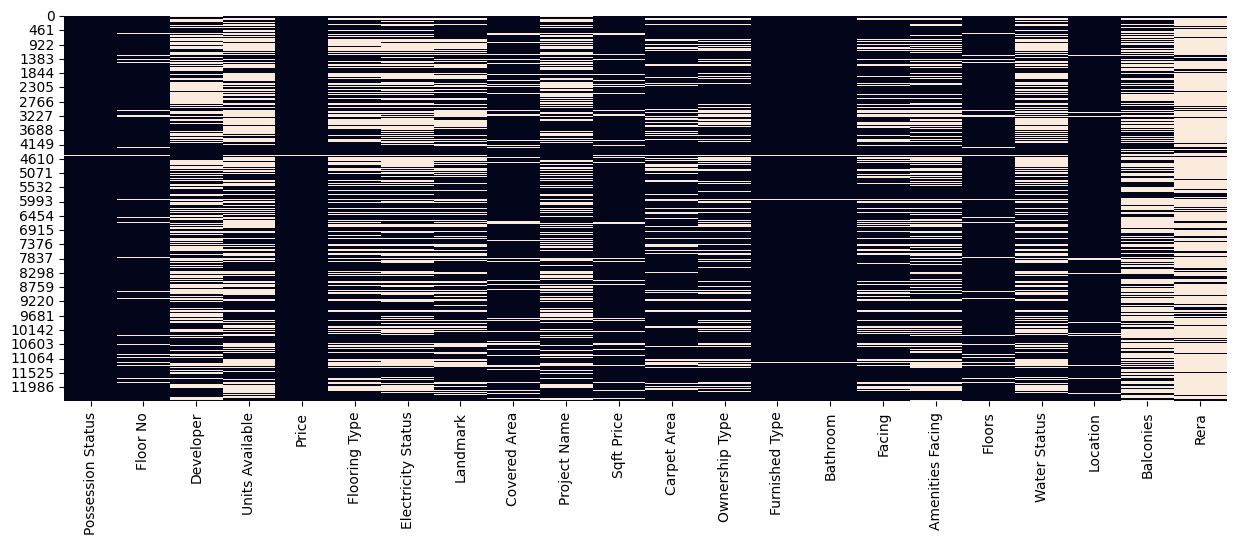

In [11]:
# Heat Map Visualization 
def show_heatmap(df):
    df_missing_data = df.loc[:, df.isnull().any()]
    plt.figure(figsize =(15,5))
    sns.heatmap(df_missing_data.isnull(), cbar = False)
show_heatmap(df)

##### From the heat map what can be seen is the missing value does not seem have to a fixed pattern accross the variables, however there seems to be some pattern within  a variable especially floors and floor no

In [12]:
df.shape

(12443, 118)

## Imputation of Missing Values 

In [13]:
# Replace the developer info with 'Unknown', it would help to categorize the unknown developers
df['Developer'].fillna('Unknown', inplace=True)
# Replace NaN values in 'Project Name' with values from 'Developer Name'
df['Project Name'] = df['Project Name'].fillna(df['Developer'])

C:\Users\gmnai\AppData\Local\Temp\ipykernel_20884\1346266146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Developer'].fillna('Unknown', inplace=True)


In [14]:
# Replace values in 'Floor No'
df['Floor No'] = df['Floor No'].replace({
    'Ground': 0,            # Replace "Ground" with "0"
    'Upper Basement': 0,     # Replace "Upper Basement" with "0"
    'Lower Basement': -1     # Replace "Lower Basement" with "-1"
})
df[['Floor No']]=df[['Floor No']].astype('float')
# Calculate the mode of 'Floor No' for each 'Project Name'
mode_units = df.groupby('Project Name')['Floor No'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Floor No' with the corresponding mode for the 'Project Name'
df['Floor No'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Floor No']) else row['Floor No'], axis=1
)

In [15]:
# Calculate the mode of 'Units Available' for each 'Project Name'
mode_units = df.groupby('Project Name')['Units Available'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

mode_units

Project Name
 Lakshachandi Heights      0.0
 Omkar Apartment           NaN
10 Central Avenue          0.0
111 Hyde Park              2.0
127 Raj Home               5.0
                          ... 
shyam chs                  NaN
takshila society           1.0
vidya apartment            NaN
vignesh plaza              1.0
yesu anand hights         10.0
Name: Units Available, Length: 2329, dtype: float64

In [16]:
# Replace NaN values in 'Units Available' with the corresponding mode for the 'Project Name'
df['Units Available'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Units Available']) else row['Units Available'], axis=1
)

In [17]:
# If Units Available is Null consider it as not available
df['Units Available'].fillna(0, inplace=True)

C:\Users\gmnai\AppData\Local\Temp\ipykernel_20884\2736949883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Units Available'].fillna(0, inplace=True)


In [18]:
missing_percentage=df.isnull().mean()* 100
missing_percentage
high_missing_columns=missing_percentage[missing_percentage>10].index.to_list()
high_missing_columns

['Flooring Type',
 'Electricity Status',
 'Landmark',
 'Carpet Area',
 'Ownership Type',
 'Facing',
 'Amenities Facing',
 'Water Status',
 'Balconies',
 'Rera']

#### Let us analyze the categorical variable Flooring Type

<Axes: xlabel='Flooring Type', ylabel='count'>

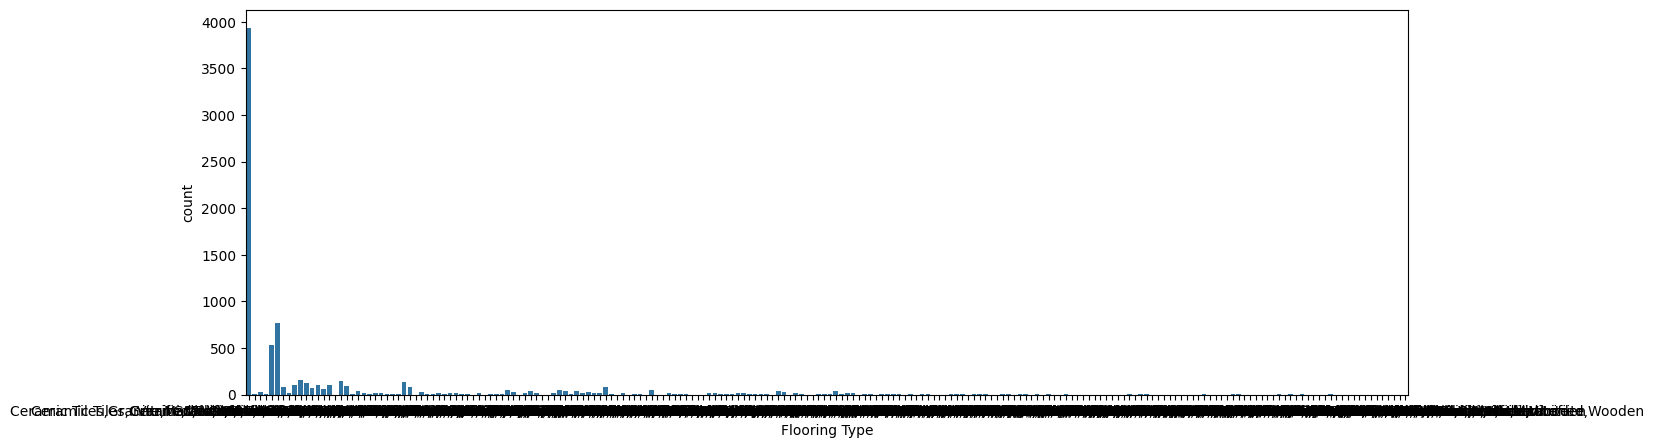

In [19]:
# Count plot of 'Flooring Type'
plt.figure(figsize =(15,5))
sns.countplot(data=df, x='Flooring Type')

In [20]:
df['Flooring Type'].value_counts()

Flooring Type
Vitrified                                                                        3933
Marble                                                                            764
Ceramic Tiles                                                                     538
Normal Tiles/Kotah Stone                                                          153
Vitrified,Wooden                                                                  148
                                                                                 ... 
Ceramic Tiles,Granite,Marble,Marbonite,Mosaic,Normal Tiles/Kotah Stone,Wooden       1
Mosaic,Ceramic Tiles,Marble,Normal Tiles/Kotah Stone,Granite                        1
Ceramic Tiles,Granite,Marbonite,Mosaic,Vitrified                                    1
Mosaic,Vitrified,Wooden,Ceramic Tiles,Marble,Normal Tiles/Kotah Stone,Granite       1
Granite,Marble,Marbonite,Normal Tiles/Kotah Stone,Vitrified,Wooden                  1
Name: count, Length: 202, dtype: int64

In [21]:
# There are mixed values in the data hence make it a single value for more detailed classificartion
# Split the 'Flooring Type' by comma and use the first part of the split string
# Check and split 'Flooring Type', handling cases where it is not a string
df['Flooring Type'] = df['Flooring Type'].apply(
    lambda x: str(x).split(',')[0] if isinstance(x, str) else x
)
df['Flooring Type'].value_counts()

Flooring Type
Vitrified                   4588
Ceramic Tiles               1410
Marble                      1047
Granite                      392
Mosaic                       171
Normal Tiles/Kotah Stone     164
Marbonite                    151
Wooden                        81
Name: count, dtype: int64

C:\Users\gmnai\AppData\Local\Temp\ipykernel_20884\1186746547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flooring Type'].fillna('Vitrified', inplace=True)


<Axes: xlabel='Flooring Type', ylabel='count'>

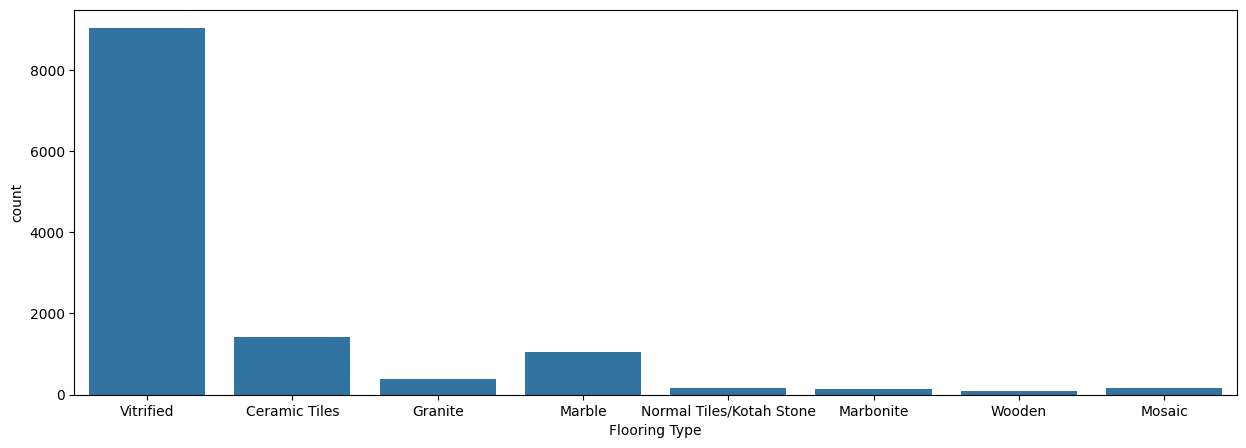

In [22]:
# Since majority of the floor type is Vitrified, hence replace the floor type with Vitrified
df['Flooring Type'].fillna('Vitrified', inplace=True)
# Count plot of 'Flooring Type'
plt.figure(figsize =(15,5))
sns.countplot(data=df, x='Flooring Type')

In [23]:
missing_percentage=df.isnull().mean()* 100
missing_percentage
high_missing_columns=missing_percentage[missing_percentage>0].index.to_list()
high_missing_columns

['Possession Status',
 'Price',
 'Electricity Status',
 'Landmark',
 'Covered Area',
 'Sqft Price',
 'Carpet Area',
 'Ownership Type',
 'Furnished Type',
 'Bathroom',
 'Facing',
 'Amenities Facing',
 'Floors',
 'Water Status',
 'Location',
 'Balconies',
 'Rera']

In [24]:
df.shape

(12443, 118)

In [25]:
df['Possession Status'].value_counts()

Possession Status
Ready to Move         9735
Under Construction    2630
Name: count, dtype: int64

In [26]:
# Calculate the mode of 'Possession Status' for each 'Project Name'
mode_units = df.groupby('Project Name')['Possession Status'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Possession Status' with the corresponding mode for the 'Project Name'
df['Possession Status'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Possession Status']) else row['Possession Status'], axis=1
)

In [27]:
df['Possession Status'].value_counts()

Possession Status
Ready to Move         9803
Under Construction    2633
0                        7
Name: count, dtype: int64

In [28]:
missing_percentage=df.isnull().mean()* 100
missing_percentage
high_missing_columns=missing_percentage[missing_percentage>0].index.to_list()
high_missing_columns

['Price',
 'Electricity Status',
 'Landmark',
 'Covered Area',
 'Sqft Price',
 'Carpet Area',
 'Ownership Type',
 'Furnished Type',
 'Bathroom',
 'Facing',
 'Amenities Facing',
 'Floors',
 'Water Status',
 'Location',
 'Balconies',
 'Rera']

In [29]:
# Replace NaN values in 'Price' with 'sqft Price' * 'Covered Area' if both are present
df['Price'] = df.apply(
    lambda row: row['Sqft Price'] * row['Covered Area'] if pd.notna(row['Sqft Price']) and pd.notna(row['Covered Area']) else row['Price'],
    axis=1
)

In [30]:
# Replace NaN values in 'Sqft Price' with 'Price' / 'Covered Area' if both are present
df['Sqft Price'] = df.apply(
    lambda row: row['Price'] / row['Covered Area'] if  pd.notna(row['Price']) and pd.notna(row['Covered Area']) else row['Price'],
    axis=1
)

In [31]:
df[df['Sqft Price'].isna()].shape

(79, 118)

In [32]:
df[df['Price'].isna()].shape

(79, 118)

In [33]:
df.dropna(subset=['Price'], inplace=True)

In [34]:
get_missing_data(df)

,Total,Percent
Rera,10199,82.489486
Balconies,6629,53.615335
Electricity Status,5352,43.286962
Water Status,5324,43.060498
Landmark,4336,35.069557
Amenities Facing,3793,30.677774
Facing,3263,26.391136
Ownership Type,2956,23.908120
Carpet Area,2493,20.163378
Covered Area,1074,8.686509


In [35]:
# Drow rows if 'Covered Area', 'Carpet Area' both are null
df = df.dropna(subset=['Covered Area', 'Carpet Area'], how='all')

In [36]:
df.shape

(12360, 118)

In [37]:
df['Area Difference (%)'] = ((df['Covered Area'] - df['Carpet Area']) / df['Covered Area'].replace(0, np.nan)) * 100
# Step 1: Calculate the mean of 'Area Difference (%)'
mean_difference = df['Area Difference (%)'].mean()
mean_difference

23.63938233935636

In [38]:
# Step 2: Replace NaN values in 'Covered Area'
df['Covered Area'].fillna(df['Carpet Area'] * (1 + mean_difference / 100), inplace=True)

C:\Users\gmnai\AppData\Local\Temp\ipykernel_20884\3885132769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Covered Area'].fillna(df['Carpet Area'] * (1 + mean_difference / 100), inplace=True)


In [39]:
#Replace NaN values in 'Carpet Area'
df['Carpet Area'].fillna(df['Covered Area'] * (1 - mean_difference / 100), inplace=True)

C:\Users\gmnai\AppData\Local\Temp\ipykernel_20884\3255260217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Carpet Area'].fillna(df['Covered Area'] * (1 - mean_difference / 100), inplace=True)


In [40]:
df['Area Difference (%)'] = ((df['Covered Area'] - df['Carpet Area']) / df['Covered Area'].replace(0, np.nan)) * 100
df

,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Project Name,...,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area Difference (%)
0,Under Construction,5.0,Unknown,1.0,3149600.0,Vitrified,No/Rare Powercut,Kalyan West Bapgaon,635.000000,Unknown,...,1,1,1,1,1,1,1,1,1,40.944882
1,Ready to Move,20.0,TATA Housing Development Company Ltd.,10.0,6299520.0,Vitrified,No/Rare Powercut,Rajoli naka,579.000000,Tata Amantra,...,1,1,1,1,1,1,1,1,1,0.000000
2,Ready to Move,18.0,Sai Satyam Developers,0.0,5399200.0,Vitrified,No/Rare Powercut,This property has reputed scholl ints vicinity.,850.000000,Sai Satyam Homes,...,1,1,1,1,1,1,1,1,1,31.176471
3,Under Construction,5.0,Birla Estates,70.0,8999550.0,Vitrified,No/Rare Powercut,Shahad is one of the attractive locations to o...,1050.000000,Birla Vanya,...,1,1,1,1,1,1,1,1,1,22.380952
4,Under Construction,8.0,Godrej Properties,1.0,4950264.0,Vitrified,NaN,majiwada metro station,561.000000,Godrej Nirvaan,...,1,1,1,1,1,1,1,1,1,25.311943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,Ready to Move,11.0,Atul Projects,1.0,18709218.0,Vitrified,No/Rare Powercut,NaN,891.000000,Hillcrest,...,0,0,0,0,0,0,0,0,0,23.639382
12439,Under Construction,10.0,Kalpataru Ltd.,20.0,30999904.0,Ceramic Tiles,No/Rare Powercut,Located in JVLR,1376.000000,Kalpataru Vivant,...,1,1,1,1,1,1,1,1,1,21.802326
12440,Under Construction,5.0,Kalpataru Ltd.,7.0,18499840.0,Marble,No/Rare Powercut,"Jvlr Rd, near Icchapurti Ganesh Temple, Joges...",970.000000,Kalpataru Vivant,...,1,1,1,1,1,1,1,1,1,36.288660
12441,Ready to Move,1.0,Unknown,0.0,22000000.0,Vitrified,No/Rare Powercut,NaN,1015.079329,Unknown,...,1,1,1,1,1,1,1,1,1,19.119622


In [41]:
#Replace Based on Property Type or Developer
df.loc[:, 'Balconies'] = df.groupby('Developer')['Balconies'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

In [42]:
#Replace Based on Property Type or Developer
df.loc[:, 'Bathroom'] = df.groupby('Developer')['Bathroom'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [43]:
# Replace the Facing info with 'Unknown'
df.loc[:, 'Facing'] = df['Facing'].fillna('Unknown')

In [44]:
df.loc[:, 'Floors'] =  df['Floors'].fillna(df.apply(lambda row: row['Floor No'] if row['Floor No'] != 0 else np.nan, axis=1))

In [45]:
# Replace the Facing info with 'Unfurnished'
df.loc[:, 'Furnished Type'] = df['Furnished Type'].fillna(df['Furnished Type'].mode())

In [46]:
get_missing_data(df)

,Total,Percent
Rera,10195,82.483819
Electricity Status,5350,43.284790
Water Status,5322,43.058252
Landmark,4333,35.056634
Amenities Facing,3790,30.663430
Ownership Type,2954,23.899676
Location,321,2.597087
Floors,63,0.509709
Furnished Type,36,0.291262
Bathroom,6,0.048544


In [47]:
# Calculate the mode of 'Electricity Status' for each 'Project Name'
mode_units = df.groupby('Project Name')['Electricity Status'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Electricity Status' with the corresponding mode for the 'Project Name'
df['Electricity Status'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Electricity Status']) else row['Electricity Status'], axis=1
)

In [48]:
# Calculate the mode of 'Water Status' for each 'Project Name'
mode_units = df.groupby('Project Name')['Water Status'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Water Status' with the corresponding mode for the 'Project Name'
df['Water Status'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Water Status']) else row['Water Status'], axis=1
)

In [49]:
# Calculate the mode of 'Landmark' for each 'Project Name'
mode_units = df.groupby('Project Name')['Landmark'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Landmark' with the corresponding mode for the 'Project Name'
df['Landmark'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Landmark']) else row['Landmark'], axis=1
)

In [50]:
get_missing_data(df)

,Total,Percent
Rera,10195,82.483819
Amenities Facing,3790,30.663430
Ownership Type,2954,23.899676
Location,321,2.597087
Floors,63,0.509709
Furnished Type,36,0.291262
Bathroom,6,0.048544


In [51]:
# Calculate the mode of 'Furnished Type' for each 'Project Name'
mode_units = df.groupby('Project Name')['Furnished Type'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Furnished Type' with the corresponding mode for the 'Project Name'
df['Furnished Type'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Furnished Type']) else row['Furnished Type'], axis=1
)

In [52]:
# Calculate the mode of 'Location' for each 'Project Name'
mode_units = df.groupby('Project Name')['Location'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)

# Replace NaN values in 'Location' with the corresponding mode for the 'Project Name'
df['Location'] = df.apply(
    lambda row: mode_units.get(row['Project Name'], 0) if pd.isna(row['Location']) else row['Location'], axis=1
)

In [53]:
get_missing_data(df)

,Total,Percent
Rera,10195,82.483819
Amenities Facing,3790,30.663430
Ownership Type,2954,23.899676
Floors,63,0.509709
Bathroom,6,0.048544


In [54]:
# Dropping Rera,  As it has 82% of the data has missing values 
if 'Rera' in df.columns:
    df = df.drop(columns=['Rera'])

In [55]:
get_missing_data(df)

,Total,Percent
Amenities Facing,3790,30.663430
Ownership Type,2954,23.899676
Floors,63,0.509709
Bathroom,6,0.048544


In [56]:
df.City.value_counts()

City
Mumbai       8362
Thane        3968
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: count, dtype: int64

In [57]:
df= df[df['City'].isin(['Mumbai', 'Thane'])]
df.City.value_counts()

City
Mumbai    8362
Thane     3968
Name: count, dtype: int64

In [58]:
#Convert Price to Millions for better readability
df['Price (Million)'] = df['Price'] / 1000000

In [59]:
#Encode High-Rise vs. Low-Rise (Assuming 10+ floors is high-rise)
df['Building Type'] = df['Floors'].apply(lambda x: 'High-Rise' if x >= 10 else 'Low-Rise')

##### from heat map it is seen that missing values are scatterred accross for Flooring Type

In [60]:
# Convert strings to numbers
df['Flooring_Type_Encoded'], _ = pd.factorize(df['Flooring Type'])

df[['Flooring_Type_Encoded','Flooring Type']].value_counts()

Flooring_Type_Encoded  Flooring Type           
0                      Vitrified                   8922
1                      Ceramic Tiles               1407
3                      Marble                      1044
2                      Granite                      391
7                      Mosaic                       171
4                      Normal Tiles/Kotah Stone     163
5                      Marbonite                    151
6                      Wooden                        81
Name: count, dtype: int64

## Generate Visualizations

#### Price vs. Location (City-Wise Price Distribution)

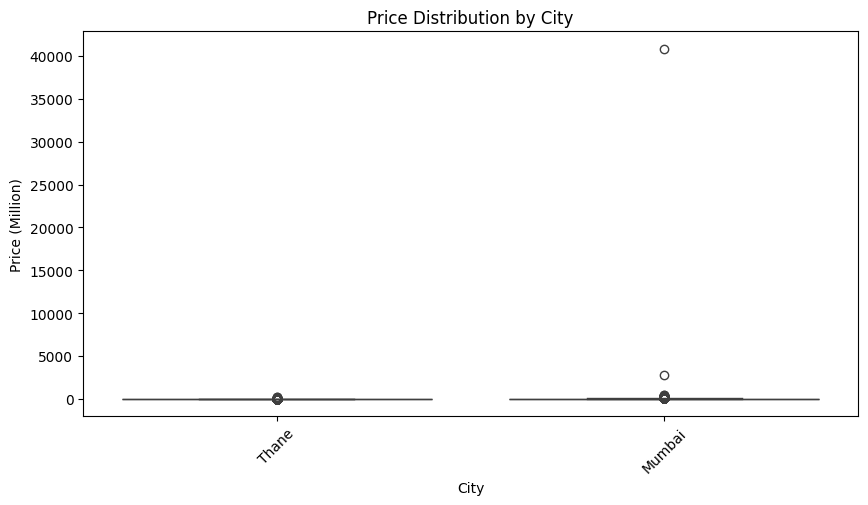

In [61]:
#Before outlier treatment on Price (Million)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='City', y='Price (Million)', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by City')
plt.show()


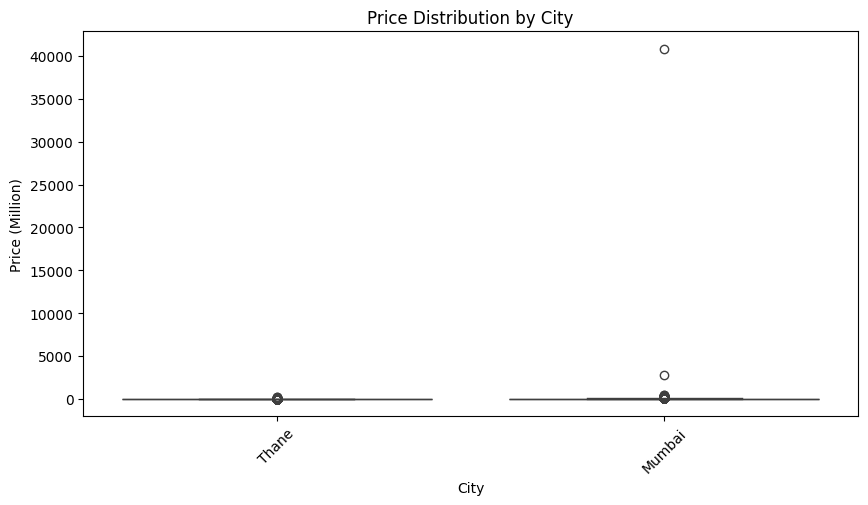

In [62]:
#After outlier treatment on Price (Million)

plt.figure(figsize=(10, 5))
sns.boxplot(x='City', y='Price (Million)', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by City')
plt.show()

Based on Plot above - there hardly are any records for cities other then Mumbai and Thane hence, removing them from the data set may not make big difference.

In [63]:
df['City'].unique()

array(['Thane', 'Mumbai'], dtype=object)

In [64]:
#There is very high Price variation due to which no Box Plot fitting in.
df['Price (Million)'].describe()

count    12330.000000
mean        26.715318
std        369.365714
min          0.000000
25%          6.999820
50%         13.499910
75%         25.999108
max      40800.000000
Name: Price (Million), dtype: float64

In [65]:
q1=df['Price (Million)'].quantile(.25)
q3=df['Price (Million)'].quantile(.75)
IQR = q3-q1
IQR

18.9992885

In [66]:
Whiskers_rght = q3+1.5*IQR
IQR
Whiskers_rght

54.49804125

In [67]:
low_bound=q1-1.5* IQR
upper_bound=q3+1.5*IQR

In [68]:
#Idnetify outliers
outliers=df[(df['Price (Million)']<low_bound)|(df['Price (Million)']>upper_bound)]
                                               

In [69]:
# These are the outliers that we remove keeping median in next step.
outliers.describe()

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Bathroom,Bedroom,Floors,Balconies,...,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area Difference (%),Price (Million),Flooring_Type_Encoded
count,1254.000000,1254.000000,1.254000e+03,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1242.000000,1254.000000,...,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,17.501595,3.681021,1.297706e+08,2461.955128,1.256853e+07,1876.330155,3.891547,3.617225,31.871176,1.788676,...,0.854864,0.854864,0.854864,0.856459,0.854864,0.858054,0.854864,21.612447,129.770558,1.397129
std,14.632434,15.393545,1.153020e+09,1122.042555,8.636521e+07,923.692475,1.027651,0.795171,22.080969,1.263711,...,0.352378,0.352378,0.352378,0.350763,0.352378,0.349134,0.352378,19.296965,1153.020122,1.618486
min,-1.000000,0.000000,5.469897e+07,79.000000,4.498000e+03,79.000000,1.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-454.316069,54.698974,0.000000
25%,6.000000,0.000000,6.499837e+07,1706.667607,3.105250e+04,1330.000000,3.000000,3.000000,14.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.526515,64.998368,0.000000
50%,12.000000,0.000000,7.989887e+07,2200.000000,3.956750e+04,1718.000000,4.000000,4.000000,27.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.145604,79.898870,1.000000
75%,26.000000,2.000000,1.050000e+08,2996.750000,5.500000e+04,2115.000000,4.000000,4.000000,50.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.120569,105.000000,3.000000
max,71.000000,400.000000,4.080000e+10,15006.000000,2.800000e+09,20870.000000,10.000000,6.000000,91.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.670399,40800.000000,7.000000


In [70]:
#before removing outliers from Price-Million
df.shape

(12330, 121)

In [71]:
# Removing outliers from the dataframe
median_value=df['Price (Million)'].median()
df['Price (Million)']=np.where((df['Price (Million)']<low_bound)
                                        |(df['Price (Million)']>upper_bound),median_value,
                                        df['Price (Million)'])

In [72]:
#after removing outliers from Price-Million
df.shape

(12330, 121)

In [73]:
df['Price (Million)'].describe()

count    12330.000000
mean        14.890226
std         10.760181
min          0.000000
25%          6.999820
50%         13.499907
75%         19.000150
max         54.462784
Name: Price (Million), dtype: float64

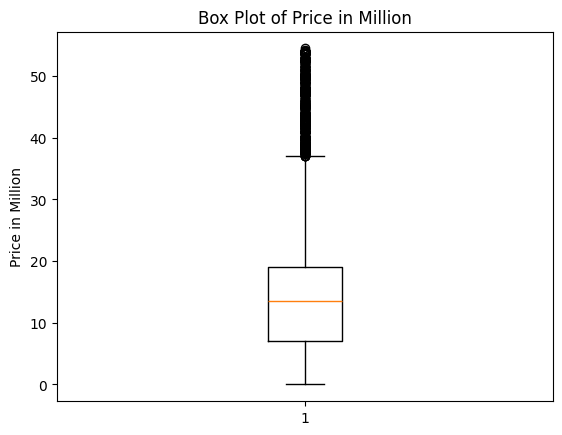

In [74]:
#After cleaning replacing outliers via median

plt.boxplot(df['Price (Million)'])
plt.title('Box Plot of Price in Million')
plt.ylabel('Price in Million')
plt.show()

#### Price vs. Number of Floors (High-Rise vs. Low-Rise)

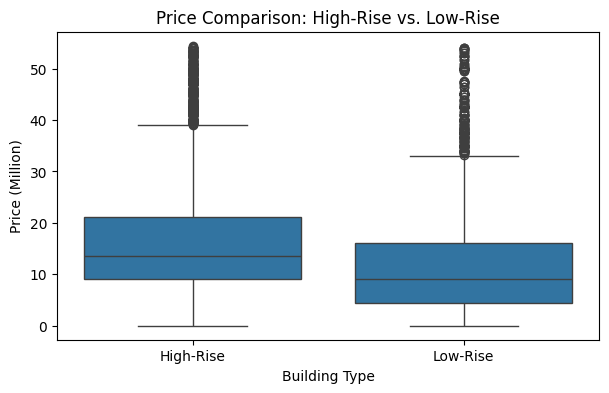

In [75]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Building Type', y='Price (Million)', data=df)
plt.title('Price Comparison: High-Rise vs. Low-Rise')
plt.show()


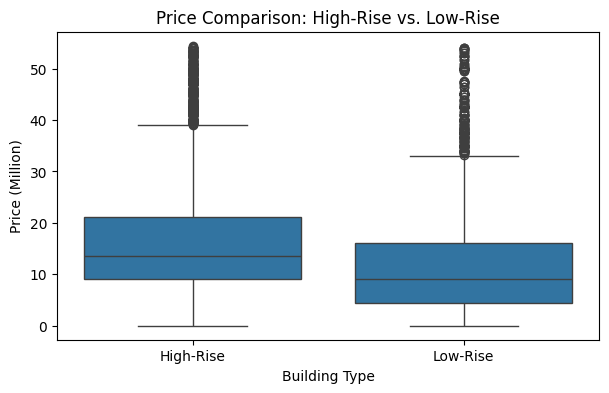

In [76]:
#After removing Outliers from Price (Million) only keeping mid segment
plt.figure(figsize=(7, 4))
sns.boxplot(x='Building Type', y='Price (Million)', data=df)
plt.title('Price Comparison: High-Rise vs. Low-Rise')
plt.show()

#### Price vs. Furnishing Status

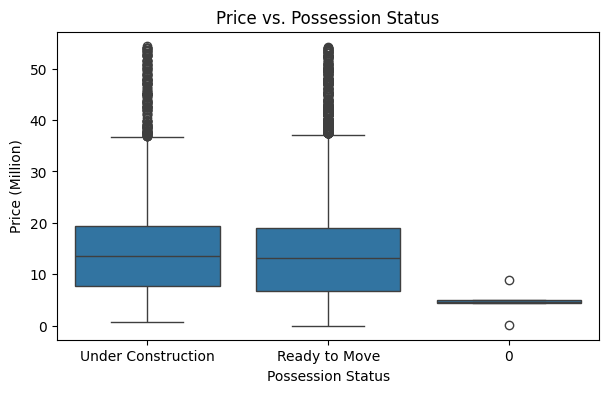

In [77]:
#Before outlier treatment on Price (Million)
plt.figure(figsize=(7, 4))
sns.boxplot(x='Possession Status', y='Price (Million)', data=df)
plt.title('Price vs. Possession Status')
plt.show()


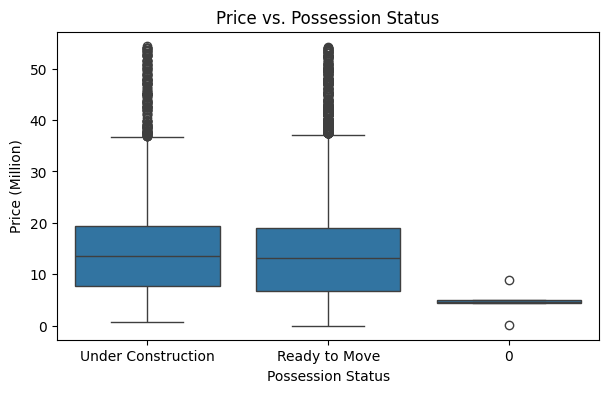

In [78]:
#Before outlier treatment on Price (Million)
plt.figure(figsize=(7, 4))
sns.boxplot(x='Possession Status', y='Price (Million)', data=df)
plt.title('Price vs. Possession Status')
plt.show()

#### Price vs. Facing Direction

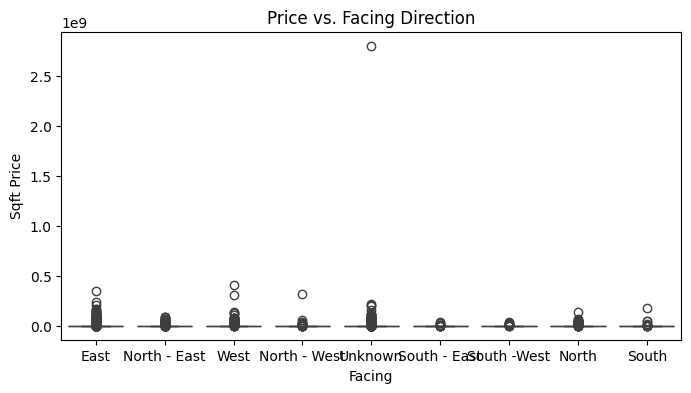

In [79]:
#Before outlier treatment on Price (Million)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Facing', y='Sqft Price', data=df)
# plt.xticks(rotation=45)
plt.title('Price vs. Facing Direction')
plt.show()


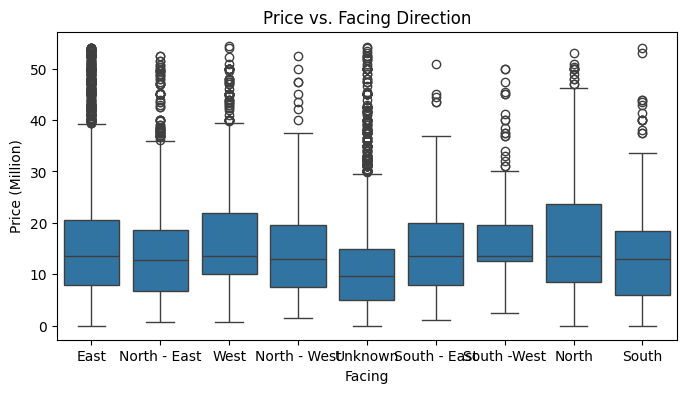

In [80]:
#After outlier treatment on Price (Million)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Facing', y='Price (Million)', data=df)
# plt.xticks(rotation=45)
plt.title('Price vs. Facing Direction')
plt.show()


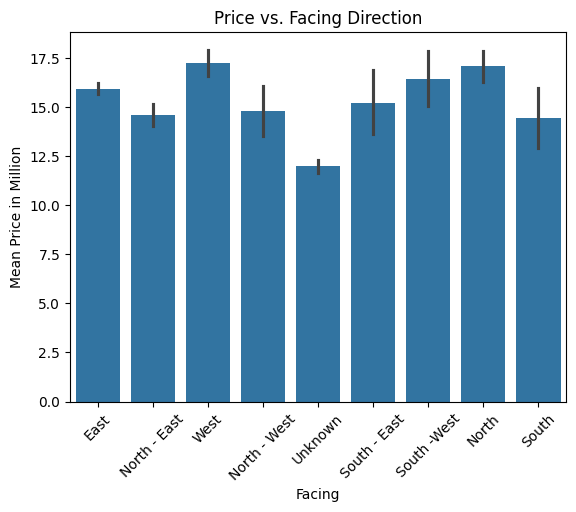

In [81]:
#After outlier treatment on Price (Million)
sns.barplot(data=df, x='Facing', y='Price (Million)')
plt.title('Price vs. Facing Direction')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('Facing')
plt.show()

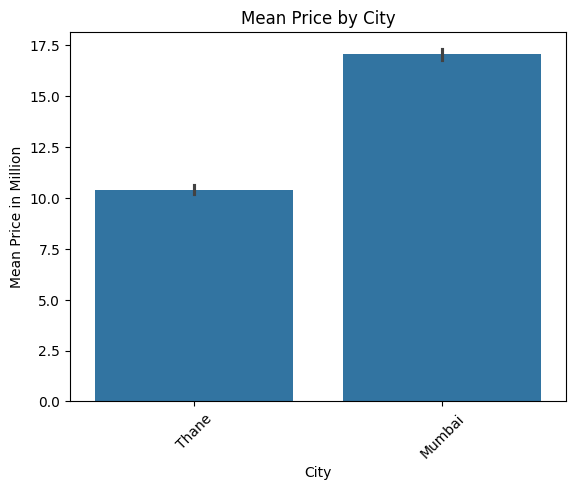

In [82]:
#After outlier treatment on Price (Million)
sns.barplot(data=df, x='City', y='Price (Million)')
plt.title('Mean Price by City')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('City')
plt.show()

In [83]:
# List of all amenities columns
amenities_columns = [
    "Power Back Up", "Lift", "Rain Water Harvesting", "Club House", "Swimming Pool", "Gymnasium", "Park",
    "Parking", "Security", "Water Storage", "Private Terrace/Garden", "Vaastu Compliant", "Service/Goods Lift",
    "Air Conditioned", "Visitor Parking", "Intercom Facility", "Maintenance Staff", "Waste Disposal", 
    "Laundry Service", "Internet/Wi-Fi Connectivity", "DTH Television Facility", "RO Water System", 
    "Banquet Hall", "Bar/Lounge", "Cafeteria/Food Court", "Conference Room", "Piped Gas", 
    "Jogging and Strolling Track", "Outdoor Tennis Courts", "Mansion", "Downtown", "Skyline View", 
    "Wrap Around Balcony", "Island Kitchen Layout", "Full Glass Wall", "House help accommodation", 
    "Concierge Services", "Garden View", "Marble flooring", "Well Furnished", "Modular Kitchen", 
    "Helipad", "Private pool", "Private Jaccuzi", "Mini Cinema Theatre", "Golf Course", "Infinity Swimming Pool", 
    "Pool with temperature control", "Sea facing", "Skydeck", "Earth quake resistant", 
    "Theme based Architectures", "Health club with Steam / Jaccuzi", "Large Clubhouse", "Large Open space",
    "Fingerprint Access", "Grand Entrance lobby", "Private Garage", "Fireplace", "Wine Cellar", "Sky Villa",
    "Water Front", "Hilltop", "Smart Home", "Barbeque space", "Kids play area", "Library", "Puja Room", 
    "Study", "Servant Room", "Store", "Aerobics Room", "Canopy Walk", "Coffee Lounge & Restaurants", 
    "Dance Studio", "Event Space & Amphitheatre", "Flower Gardens", "Guest Accommodation", 
    "Indoor Squash & Badminton Courts", "Kids Play Area", "Kids Play Pool With Water Slides", 
    "Library And Business Centre", "Meditation Area", "Multipurpose Courts", "Recreational Pool", 
    "Rentable Community Space", "Retail Boulevard (Retail Shops)", "Cycling & Jogging Track", 
    "Fire Fighting Equipment", "Aesthetically designed landscape garden"
]

# Create a new column 'Total Amenities'
df['Total Amenities'] = df[amenities_columns].sum(axis=1)

df.head()


,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Project Name,...,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area Difference (%),Price (Million),Building Type,Flooring_Type_Encoded,Total Amenities
0,Under Construction,5.0,Unknown,1.0,3149600.0,Vitrified,No/Rare Powercut,Kalyan West Bapgaon,635.0,Unknown,...,1,1,1,1,1,40.944882,3.149600,High-Rise,0,90
1,Ready to Move,20.0,TATA Housing Development Company Ltd.,10.0,6299520.0,Vitrified,No/Rare Powercut,Rajoli naka,579.0,Tata Amantra,...,1,1,1,1,1,0.000000,6.299520,High-Rise,0,90
2,Ready to Move,18.0,Sai Satyam Developers,0.0,5399200.0,Vitrified,No/Rare Powercut,This property has reputed scholl ints vicinity.,850.0,Sai Satyam Homes,...,1,1,1,1,1,31.176471,5.399200,High-Rise,0,90
3,Under Construction,5.0,Birla Estates,70.0,8999550.0,Vitrified,No/Rare Powercut,Shahad is one of the attractive locations to o...,1050.0,Birla Vanya,...,1,1,1,1,1,22.380952,8.999550,High-Rise,0,90
4,Under Construction,8.0,Godrej Properties,1.0,4950264.0,Vitrified,No/Rare Powercut,majiwada metro station,561.0,Godrej Nirvaan,...,1,1,1,1,1,25.311943,4.950264,High-Rise,0,89


#### Categorize Properties into 4 Groups

In [84]:
def classify_property(amenity_count):
    if amenity_count >= 40:
        return "Ultra Luxury"
    elif amenity_count >= 25:
        return "Luxury"
    elif amenity_count >= 10:
        return "Elite"
    else:
        return "Basic"

# Apply classification
df['Property Class'] = df['Total Amenities'].apply(classify_property)


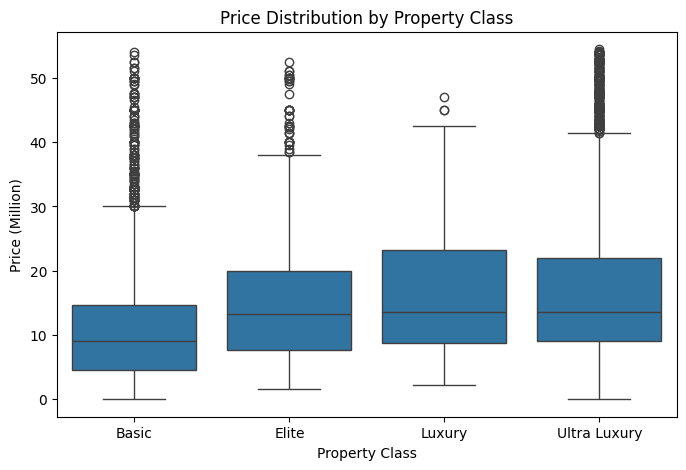

In [85]:
#Before outlier treatment on Price (Million)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Property Class', y='Price (Million)', data=df, order=['Basic', 'Elite', 'Luxury', 'Ultra Luxury'])
plt.title("Price Distribution by Property Class")
plt.show()

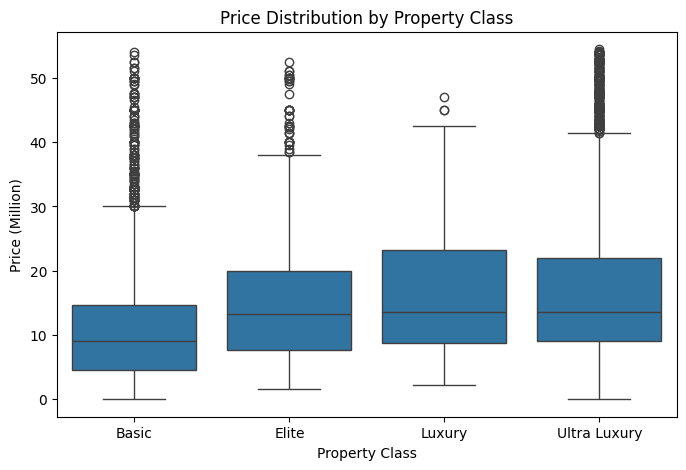

In [86]:
#After outlier treatment on Price (Million)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Property Class', y='Price (Million)', data=df, order=['Basic', 'Elite', 'Luxury', 'Ultra Luxury'])
plt.title("Price Distribution by Property Class")
plt.show()

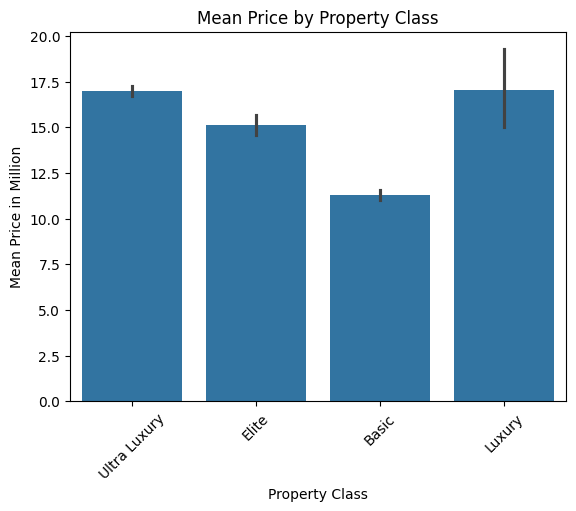

In [87]:
#After outlier treatment on Price (Million)
sns.barplot(data=df, x='Property Class', y='Price (Million)')
plt.title('Mean Price by Property Class')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('Property Class')
plt.show()

<Axes: xlabel='Bedroom', ylabel='Price (Million)'>

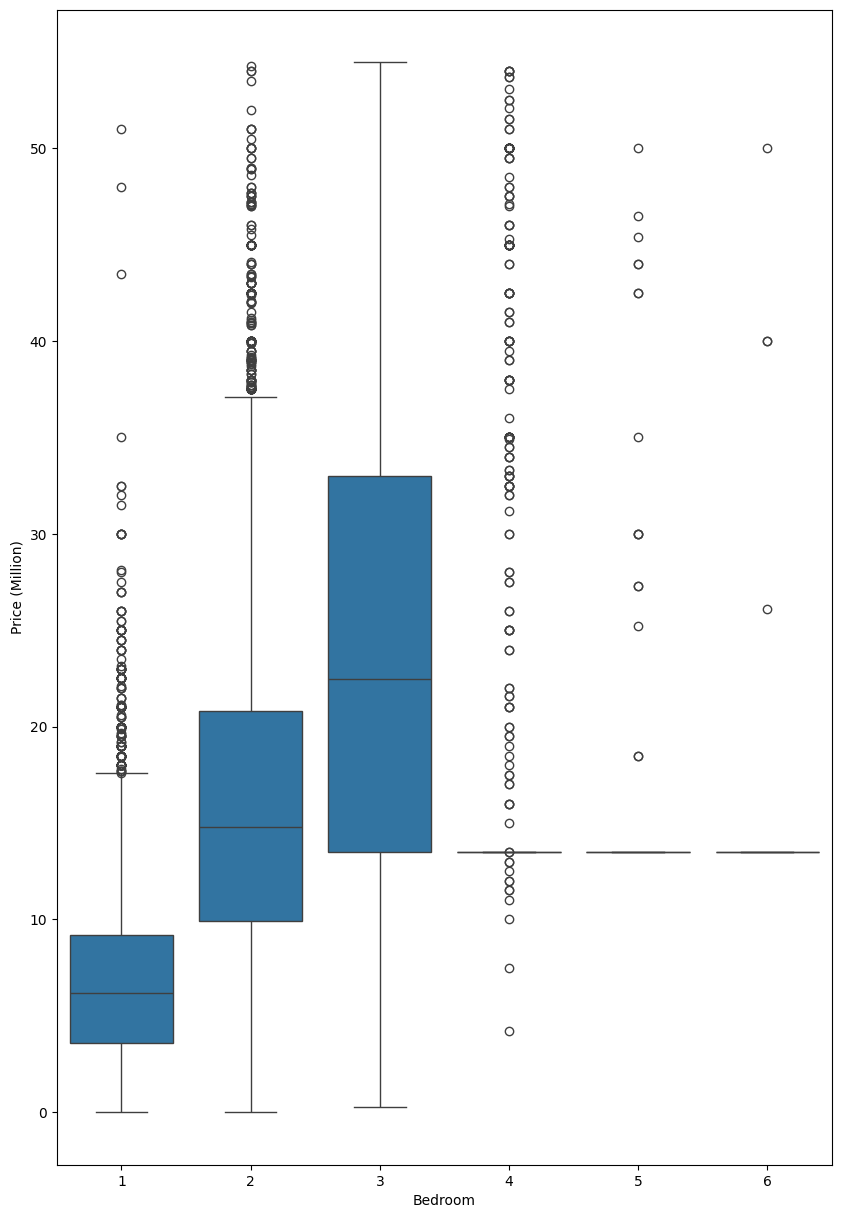

In [88]:
#After removing outlier puting median as strategy of imputation
plt.figure(figsize = (10,15))
sns.boxplot(x= df['Bedroom'], y =df['Price (Million)'])

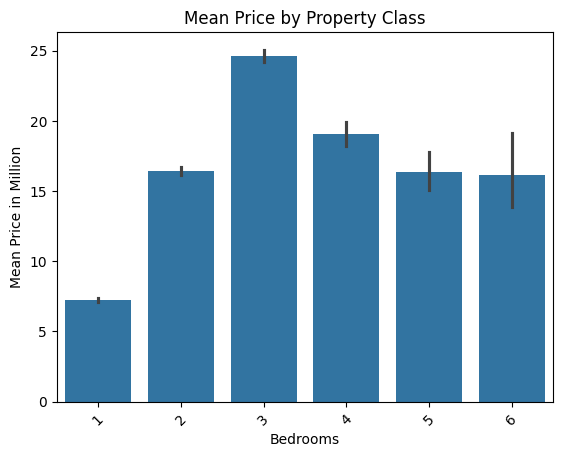

In [89]:
#After outlier treatment on Price (Million)
sns.barplot(data=df, x='Bedroom', y='Price (Million)')
plt.title('Mean Price by Property Class')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('Bedrooms')
plt.show()

In [90]:
# Convert strings to numbers
df['Possession_Status_Encoded'], _ = pd.factorize(df['Possession Status'])

df[['Possession_Status_Encoded','Possession Status']].value_counts()

Possession_Status_Encoded  Possession Status 
1                          Ready to Move         9695
0                          Under Construction    2630
2                          0                        5
Name: count, dtype: int64

In [91]:
# Convert strings to numbers
df['Society_Encoded'], _ = pd.factorize(df['Society'])

df[['Society_Encoded','Society']].value_counts()

Society_Encoded  Society
0                Y          6291
1                N          6039
Name: count, dtype: int64

In [92]:
# Convert strings to numbers
df['Furnished_Type_Encoded'], _ = pd.factorize(df['Furnished Type'])

df[['Furnished_Type_Encoded','Furnished Type']].value_counts()

Furnished_Type_Encoded  Furnished Type
0                       Unfurnished       6528
1                       Semi-Furnished    3995
2                       Furnished         1798
3                       0                    9
Name: count, dtype: int64

In [93]:
# Convert strings to numbers
df['Facing_Encoded'], _ = pd.factorize(df['Facing'])

df[['Facing_Encoded','Facing']].value_counts()

Facing_Encoded  Facing      
0               East            5215
4               Unknown         3249
1               North - East    1268
2               West            1016
7               North            795
3               North - West     256
6               South -West      189
8               South            189
5               South - East     153
Name: count, dtype: int64

In [94]:
# Convert strings to numbers
df['Transaction_Type_Encoded'], _ = pd.factorize(df['Transaction Type'])

df[['Transaction_Type_Encoded','Transaction Type']].value_counts()

Transaction_Type_Encoded  Transaction Type
1                         Resale              8450
0                         New Property        3872
2                         Rent/Lease             4
4                         Other                  3
3                         Rent                   1
Name: count, dtype: int64

In [95]:
# Convert strings to numbers
df['Type_of_Property_Encoded'], _ = pd.factorize(df['Type of Property'])

df[['Type_of_Property_Encoded','Type of Property']].value_counts()

Type_of_Property_Encoded  Type of Property       
0                         Apartment                  11773
1                         Residential House            236
2                         Builder Floor Apartment      205
4                         Villa                         78
3                         Penthouse                     38
Name: count, dtype: int64

In [96]:
# Convert strings to numbers
df['City_Encoded'], _ = pd.factorize(df['City'])

df[['City_Encoded','City']].value_counts()

City_Encoded  City  
1             Mumbai    8362
0             Thane     3968
Name: count, dtype: int64

In [97]:
# Convert strings to numbers
#df['IsPrimeLocation_Encoded'], _ = pd.factorize(df['IsPrimeLocation'])

#df[['IsPrimeLocation_Encoded','IsPrimeLocation']].value_counts()

In [98]:
# Convert strings to numbers
#df['Rera_Encoded'], _ = pd.factorize(df['Rera'])

#df[['Rera_Encoded','Rera']].value_counts()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12442
Columns: 130 entries, Possession Status to City_Encoded
dtypes: float64(11), int64(100), object(19)
memory usage: 12.3+ MB


In [100]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12442
Columns: 111 entries, Floor No to City_Encoded
dtypes: float64(11), int64(100)
memory usage: 10.5 MB


In [101]:
corr = df_numeric.corr()
corr

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Bathroom,Bedroom,Floors,Balconies,...,Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
Floor No,1.000000,0.111488,0.045837,0.328199,0.058571,0.320843,0.380503,0.320376,0.748652,0.105160,...,0.167152,0.067417,0.293475,-0.273218,-0.191826,-0.090318,-0.157858,-0.302477,-0.113341,0.064419
Units Available,0.111488,1.000000,-0.003771,-0.015337,-0.007522,-0.015113,0.018077,-0.015208,0.188671,0.014980,...,-0.017589,0.007949,0.152069,-0.294732,-0.118254,-0.082269,-0.095276,-0.253192,-0.036294,-0.011060
Price,0.045837,-0.003771,1.000000,0.066786,0.081493,0.064571,0.058537,0.058103,0.040198,0.005030,...,0.024995,0.011146,0.027896,0.001892,-0.026377,-0.001583,-0.011131,-0.021326,0.002939,0.029599
Covered Area,0.328199,-0.015337,0.066786,1.000000,0.084211,0.877938,0.779811,0.792543,0.353277,0.230852,...,0.334529,0.167087,0.286112,0.005037,-0.178134,0.057836,-0.060038,-0.080857,0.113606,0.160644
Sqft Price,0.058571,-0.007522,0.081493,0.084211,1.000000,0.099429,0.082089,0.084240,0.036360,-0.003069,...,0.027008,0.007603,-0.001593,-0.027865,-0.024222,-0.011329,0.011517,-0.017217,0.019523,0.035312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Furnished_Type_Encoded,-0.090318,-0.082269,-0.001583,0.057836,-0.011329,0.072388,0.058359,0.086696,-0.127832,0.014822,...,0.090800,0.042548,-0.089764,0.218606,0.156984,1.000000,0.090679,0.224980,0.032906,0.035602
Facing_Encoded,-0.157858,-0.095276,-0.011131,-0.060038,0.011517,-0.042759,-0.093623,-0.061158,-0.194065,-0.069551,...,-0.064988,-0.054186,-0.361139,0.224821,0.232142,0.090679,1.000000,0.282163,0.040585,-0.054417
Transaction_Type_Encoded,-0.302477,-0.253192,-0.021326,-0.080857,-0.017217,-0.066886,-0.160414,-0.081675,-0.393755,-0.057768,...,-0.076107,-0.039363,-0.422429,0.658775,0.393849,0.224980,0.282163,1.000000,0.090393,-0.133635
Type_of_Property_Encoded,-0.113341,-0.036294,0.002939,0.113606,0.019523,0.116227,0.046686,0.087987,-0.156934,-0.005310,...,-0.032268,0.003520,-0.069106,0.082194,0.092333,0.032906,0.040585,0.090393,1.000000,-0.020608


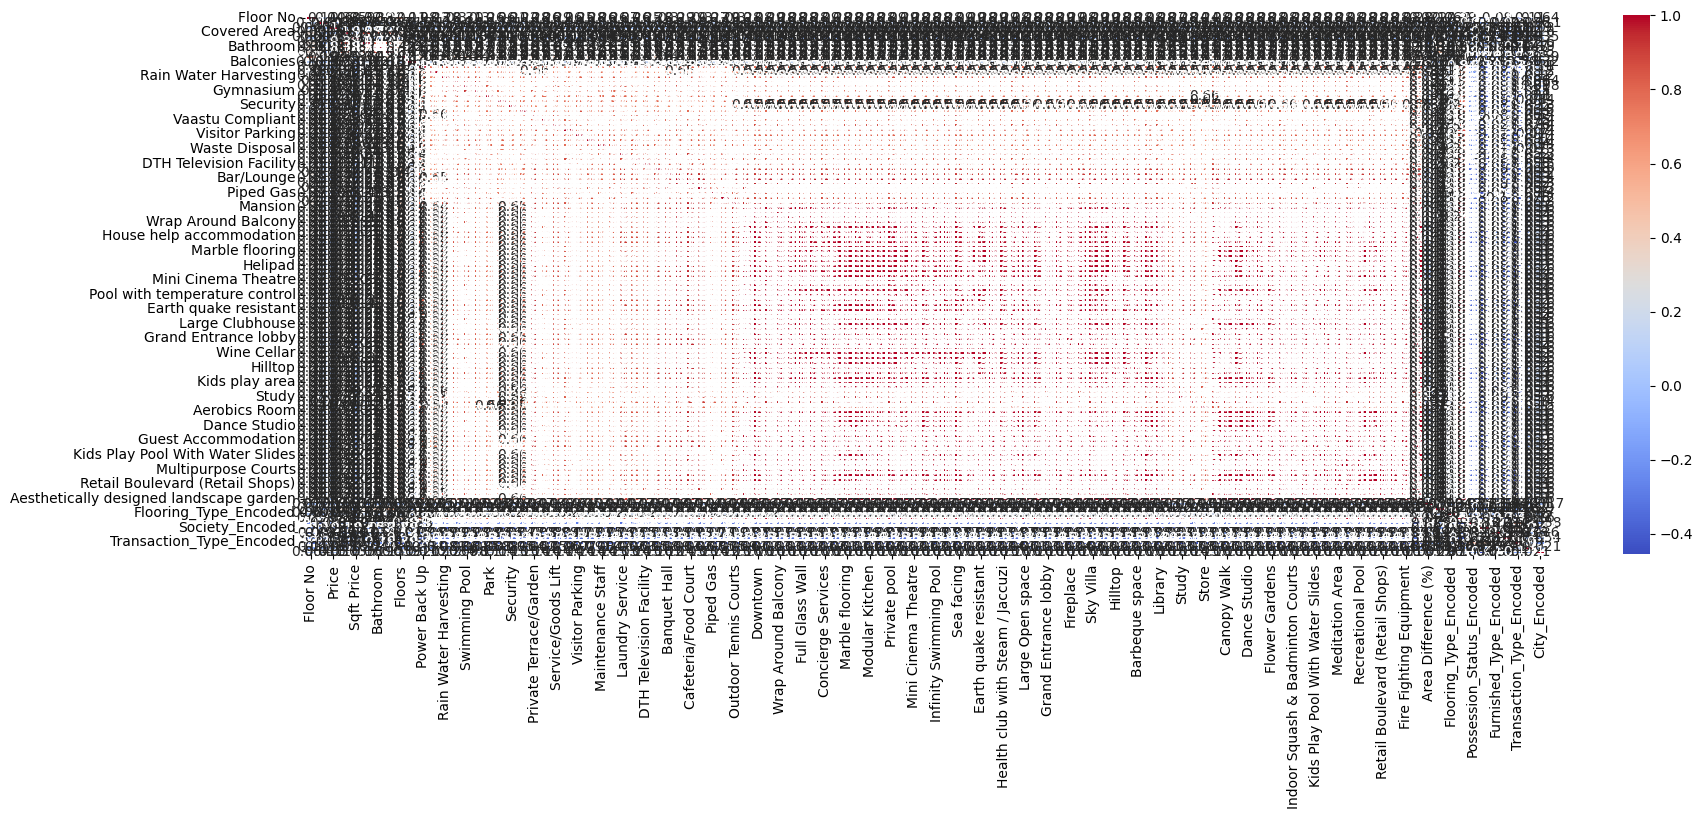

In [102]:
fig,ax=plt.subplots(figsize=(20,7))
heatmap = sns.heatmap(corr,linewidth=2,annot=True,cmap='coolwarm')

In [103]:
df.Balconies.describe()

count    12330.000000
mean         1.470803
std          0.963356
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Balconies, dtype: float64

In [104]:
df.Lift.dtypes

dtype('int64')

In [105]:
df.Bathroom.dtypes

dtype('float64')

In [106]:
df['Bathroom'] = df['Bathroom'].astype('object')
df.Bathroom.dtypes

dtype('O')

In [107]:
df.Bedroom.dtypes

dtype('int64')

In [108]:
df['Lift'] = df['Lift'].astype('object')
df.Lift.dtypes

dtype('O')

In [109]:
df['Balconies'] = df['Balconies'].astype('object')
df.Balconies.dtypes

dtype('O')

In [110]:
df['Bedroom'] = df['Bedroom'].astype('object')
df.Bedroom.dtypes

dtype('O')

<Axes: >

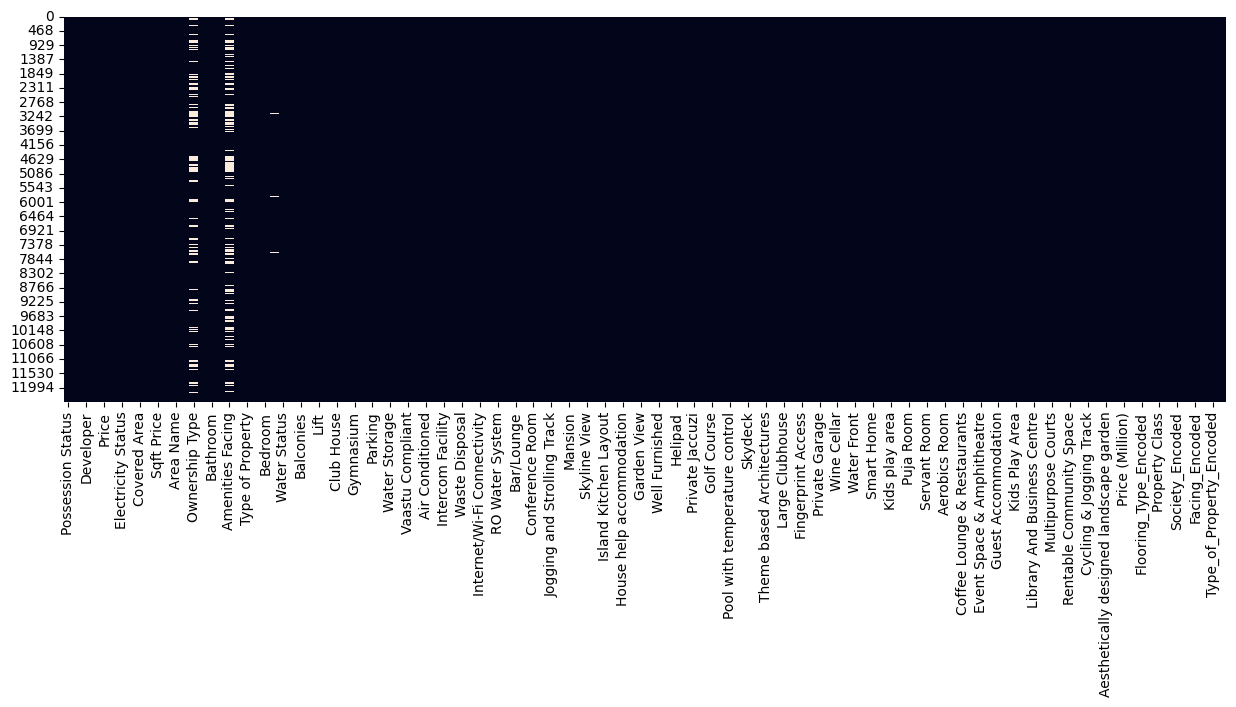

In [111]:
#We still have lot of missing Values
# Heat Map Visualization after cleansing
plt.figure(figsize =(15,5))
sns.heatmap(df.isnull(), cbar = False)

In [112]:
#get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
#missing_data['Type'] = df_cars[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent
Amenities Facing,3775,30.616383
Ownership Type,2943,23.868613
Floors,63,0.510949
Bathroom,6,0.048662
Water Front,0,0.000000
...,...,...
Visitor Parking,0,0.000000
Air Conditioned,0,0.000000
Service/Goods Lift,0,0.000000
Vaastu Compliant,0,0.000000


In [113]:
missing_percentage=df.isnull().mean()* 100
missing_percentage

Possession Status           0.0
Floor No                    0.0
Developer                   0.0
Units Available             0.0
Price                       0.0
                           ... 
Furnished_Type_Encoded      0.0
Facing_Encoded              0.0
Transaction_Type_Encoded    0.0
Type_of_Property_Encoded    0.0
City_Encoded                0.0
Length: 130, dtype: float64

In [114]:
high_missing_columns=missing_percentage[missing_percentage>55].index.to_list()
high_missing_columns

[]

In [115]:
df=df.drop(columns=high_missing_columns)
df

,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Project Name,...,Flooring_Type_Encoded,Total Amenities,Property Class,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
0,Under Construction,5.0,Unknown,1.0,3149600.0,Vitrified,No/Rare Powercut,Kalyan West Bapgaon,635.000000,Unknown,...,0,90,Ultra Luxury,0,0,0,0,0,0,0
1,Ready to Move,20.0,TATA Housing Development Company Ltd.,10.0,6299520.0,Vitrified,No/Rare Powercut,Rajoli naka,579.000000,Tata Amantra,...,0,90,Ultra Luxury,1,0,0,0,0,0,0
2,Ready to Move,18.0,Sai Satyam Developers,0.0,5399200.0,Vitrified,No/Rare Powercut,This property has reputed scholl ints vicinity.,850.000000,Sai Satyam Homes,...,0,90,Ultra Luxury,1,0,0,0,0,0,0
3,Under Construction,5.0,Birla Estates,70.0,8999550.0,Vitrified,No/Rare Powercut,Shahad is one of the attractive locations to o...,1050.000000,Birla Vanya,...,0,90,Ultra Luxury,0,0,0,0,0,0,0
4,Under Construction,8.0,Godrej Properties,1.0,4950264.0,Vitrified,No/Rare Powercut,majiwada metro station,561.000000,Godrej Nirvaan,...,0,89,Ultra Luxury,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,Ready to Move,11.0,Atul Projects,1.0,18709218.0,Vitrified,No/Rare Powercut,Opp Speez Gate no 3,891.000000,Hillcrest,...,0,0,Basic,1,1,0,4,0,0,1
12439,Under Construction,10.0,Kalpataru Ltd.,20.0,30999904.0,Ceramic Tiles,No/Rare Powercut,Located in JVLR,1376.000000,Kalpataru Vivant,...,1,90,Ultra Luxury,0,0,0,0,0,0,1
12440,Under Construction,5.0,Kalpataru Ltd.,7.0,18499840.0,Marble,No/Rare Powercut,"Jvlr Rd, near Icchapurti Ganesh Temple, Joges...",970.000000,Kalpataru Vivant,...,3,90,Ultra Luxury,0,0,1,7,0,0,1
12441,Ready to Move,1.0,Unknown,0.0,22000000.0,Vitrified,No/Rare Powercut,D Mart,1015.079329,Unknown,...,0,90,Ultra Luxury,1,0,1,8,1,0,1


In [116]:
df.groupby(['Project Name']).sum()

,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Sqft Price,...,Flooring_Type_Encoded,Total Amenities,Property Class,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
Project Name,,,,,,,,,,,,,,,,,,,,,
Lakshachandi Heights,Ready to Move,10.0,Conwood Realty,0.0,24999850.0,Vitrified,No/Rare Powercut,0,1150.000000,21739.0,...,0,15,Elite,1,1,1,0,1,0,1
Omkar Apartment,Ready to MoveReady to MoveReady to MoveReady t...,12.0,UnknownUnknownUnknownUnknown,0.0,10599600.0,VitrifiedVitrifiedVitrifiedVitrified,0,0,2100.000000,19666.0,...,0,0,BasicBasicBasicBasic,4,2,0,16,4,0,0
10 Central Avenue,Ready to Move,5.0,Raja Builders,0.0,41100000.0,Granite,No/Rare Powercut,Opp. Rose manor international school & karnata...,803.655985,41100000.0,...,2,90,Ultra Luxury,1,0,1,6,0,0,1
111 Hyde Park,Ready to MoveReady to Move,0.0,MDM RealtyMDM Realty,4.0,56000000.0,VitrifiedVitrified,No/Rare PowercutNo/Rare Powercut,upper govind nagar malad eastupper govind naga...,2500.000000,44800.0,...,0,180,Ultra LuxuryUltra Luxury,2,0,0,0,2,0,2
127 Raj Home,Under ConstructionUnder ConstructionUnder Cons...,366.0,Raj Realty GroupRaj Realty GroupRaj Realty Gro...,739.0,284195092.0,VitrifiedVitrifiedVitrifiedVitrifiedVitrifiedV...,No/Rare PowercutNo/Rare PowercutNo/Rare Powerc...,Iskon Templepenkar padaPenkarpada mira road ea...,30826.000000,324149.0,...,12,3140,Ultra LuxuryUltra LuxuryUltra LuxuryUltra Luxu...,0,0,12,31,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shyam chs,Ready to Move,7.0,Unknown,0.0,12000000.0,Vitrified,0,0,300.000000,40000.0,...,0,0,Basic,1,1,0,4,1,0,1
takshila society,Ready to MoveReady to Move,3.0,UnknownUnknown,2.0,27499500.0,Ceramic TilesCeramic Tiles,No/Rare PowercutNo/Rare Powercut,Holy Spirit HospitalHoly Spirit Hospital,1160.000000,47406.0,...,2,17,BasicElite,2,1,0,4,2,0,2
vidya apartment,Ready to Move,10.0,Unknown,0.0,60000000.0,Vitrified,0,0,1200.000000,50000.0,...,0,3,Basic,1,1,0,2,1,0,1


In [117]:

# Function to replace NaN values with mode
def replace_with_mode(group):
    # Get mode of the group, checking for an empty Series
    mode_value = group.mode()
    if not mode_value.empty:
        # Fill NaN values with the mode if it exists
        group.fillna(mode_value[0], inplace=True)
    return group

In [118]:
# Group by 'Project Name' and apply the replace_with_mode function
df['Landmark'] = df.groupby('Project Name')['Landmark'].transform(replace_with_mode)
# Display the updated DataFrame
print(df.Landmark)

0                                      Kalyan West Bapgaon
1                                              Rajoli naka
2          This property has reputed scholl ints vicinity.
3        Shahad is one of the attractive locations to o...
4                                   majiwada metro station
                               ...                        
12438                                  Opp Speez Gate no 3
12439                                      Located in JVLR
12440    Jvlr  Rd, near Icchapurti Ganesh Temple, Joges...
12441                                               D Mart
12442                      near by Western Express highway
Name: Landmark, Length: 12330, dtype: object


In [119]:
#df_misscol_removed['Project Name', 'Landmark']
df[['Project Name','Landmark']].iloc[30:90]
#See row49 and 86 row...the missing value of Landmark is replaced by mod of Project Name 

,Project Name,Landmark
30,Tycoons Solitaire Sapphire,"Close to tree house school, Dmart, KDMC garden..."
31,Unknown,Tilak Chowck
32,Unknown,Agra Road
33,Godrej Riviera,Within 4 mins from 2 stations Shahad and Ambiv...
34,Unknown,D Mart
35,Unknown,near don bosco school
36,Unknown,near don bosco school
37,Rosalie,kalyan west
38,Unknown,Yash Hotel
39,Guru Atman,Near Yogi Dam


In [120]:
# Group by 'Project Name' and apply the replace_with_mode function
df['Water Status'] = df.groupby('Project Name')['Water Status'].transform(replace_with_mode)
# Display the updated DataFrame
df['Water Status']

0        Water Availability 24 Hours Available
1        Water Availability 24 Hours Available
2        Water Availability 24 Hours Available
3        Water Availability 24 Hours Available
4        Water Availability 24 Hours Available
                         ...                  
12438    Water Availability 24 Hours Available
12439    Water Availability 24 Hours Available
12440    Water Availability 24 Hours Available
12441    Water Availability 24 Hours Available
12442    Water Availability 24 Hours Available
Name: Water Status, Length: 12330, dtype: object

In [121]:
df['Water Status'].describe()

count                                     12330
unique                                        6
top       Water Availability 24 Hours Available
freq                                      10782
Name: Water Status, dtype: object

In [122]:
# Group by 'Project Name' and apply the replace_with_mode function
df['Parking'] = df.groupby('Project Name')['Parking'].transform(replace_with_mode)
# Display the updated DataFrame
df['Parking']

0        1
1        1
2        1
3        1
4        1
        ..
12438    0
12439    1
12440    1
12441    1
12442    1
Name: Parking, Length: 12330, dtype: int64

In [123]:
df['Parking'].describe()

count    12330.000000
mean         0.685239
std          0.464439
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Parking, dtype: float64

In [124]:
df['Parking'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
12438    0
12439    1
12440    1
12441    1
12442    1
Name: Parking, Length: 12330, dtype: int64>

In [125]:
df['Parking'] = df['Parking'].astype('object')
df.Parking.dtypes

dtype('O')

In [126]:
freq_by_cities=df.groupby('City').size().reset_index(name='Frequency')
freq_by_cities

,City,Frequency
0,Mumbai,8362
1,Thane,3968


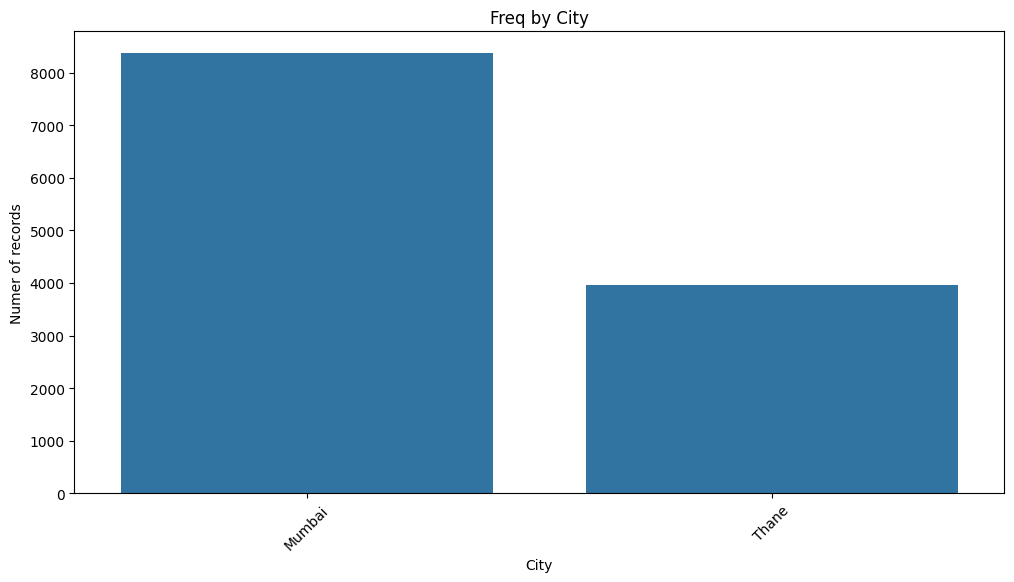

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(data=freq_by_cities, x='City', y='Frequency')
plt.title('Freq by City')
plt.xticks(rotation=45)
plt.ylabel('Numer of records')
plt.xlabel('City')
plt.show()

In [128]:
df['City'].unique()

array(['Thane', 'Mumbai'], dtype=object)

In [129]:
cities_to_drop=['Gurgaon', 'Hyderabad', 'Nagpur','Kalyan', 'Agartala', 'Palghar', 'Bhiwandi']
df_new= df[~df['City'].isin(cities_to_drop)]
df_new.City

0         Thane
1         Thane
2         Thane
3         Thane
4         Thane
          ...  
12438    Mumbai
12439    Mumbai
12440    Mumbai
12441    Mumbai
12442    Mumbai
Name: City, Length: 12330, dtype: object

In [130]:
#before
freq_by_balconies=df_new.groupby('Balconies').size().reset_index(name='Frequency')
freq_by_balconies

,Balconies,Frequency
0,0.0,570
1,1.0,8041
2,2.0,1768
3,3.0,1432
4,4.0,383
5,5.0,100
6,6.0,26
7,7.0,6
8,8.0,4


In [131]:
#before
df_balcony_price=df_new[['Balconies', 'Price (Million)']]

In [132]:
#before
avg_price_by_balcony=df_balcony_price.groupby('Balconies')['Price (Million)'].mean().reset_index()
avg_price_by_balcony

,Balconies,Price (Million)
0,0.0,15.805593
1,1.0,15.037445
2,2.0,14.379140
3,3.0,13.769956
4,4.0,15.053383
5,5.0,21.246002
6,6.0,17.871391
7,7.0,20.267020
8,8.0,13.499910


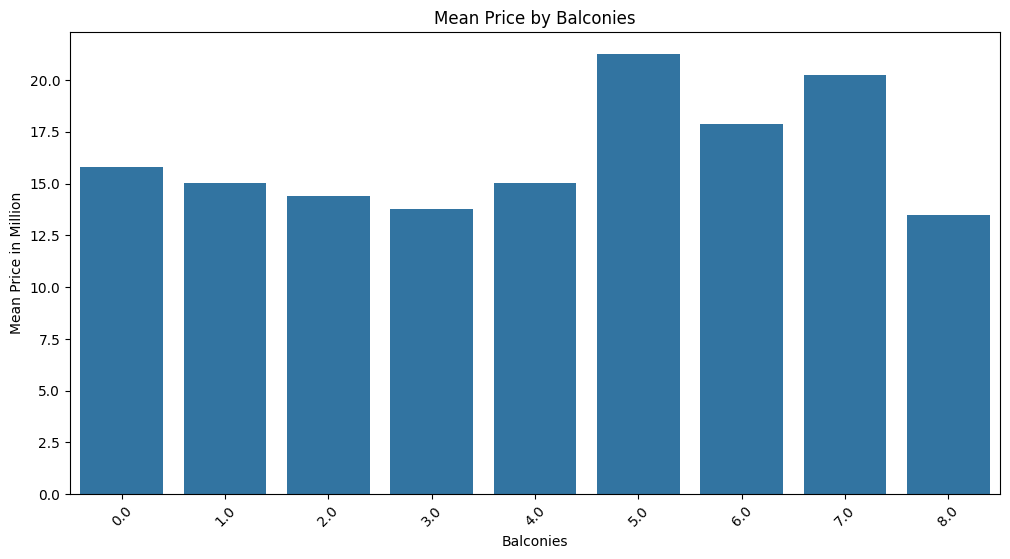

In [133]:
#before
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_balcony, x='Balconies', y='Price (Million)')
plt.title('Mean Price by Balconies')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('Balconies')
plt.show()

In [134]:
#before
df_citi_price=df_new[['City', 'Price (Million)']]

In [135]:

#before
avg_price_by_city=df_citi_price.groupby('City')['Price (Million)'].mean().reset_index()
avg_price_by_city

,City,Price (Million)
0,Mumbai,17.029833
1,Thane,10.381305


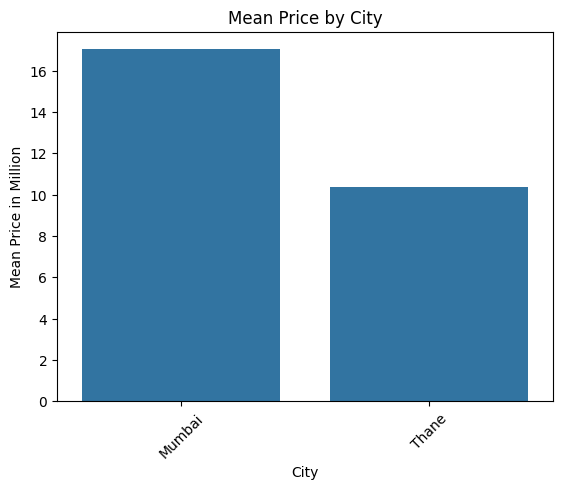

In [136]:
#before
sns.barplot(data=avg_price_by_city, x='City', y='Price (Million)')
plt.title('Mean Price by City')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('City')
plt.show()

In [137]:
#before
freq_by_bedroom=df_new.groupby('Bedroom').size().reset_index(name='Frequency')
freq_by_bedroom

,Bedroom,Frequency
0,1,4338
1,2,4814
2,3,2358
3,4,660
4,5,121
5,6,39


In [138]:
#before
df_bedroom_price=df_new[['Bedroom', 'Price (Million)']]

In [139]:
#before
avg_price_by_bedroom=df_bedroom_price.groupby('Bedroom')['Price (Million)'].mean().reset_index()
avg_price_by_bedroom

,Bedroom,Price (Million)
0,1,7.218915
1,2,16.419966
2,3,24.623767
3,4,19.044673
4,5,16.315590
5,6,16.117944


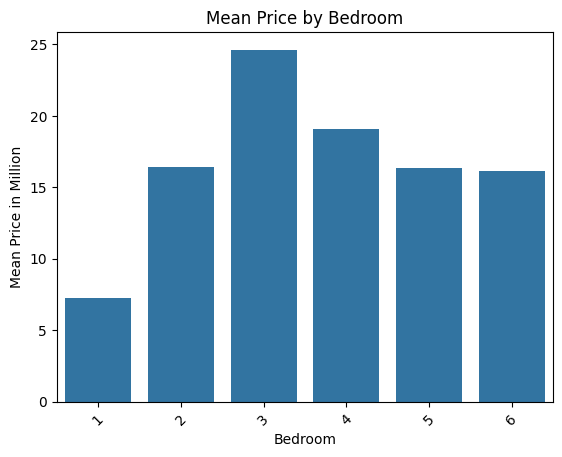

In [140]:
#before
sns.barplot(data=avg_price_by_bedroom, x='Bedroom', y='Price (Million)')
plt.title('Mean Price by Bedroom')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('Bedroom')
plt.show()

<Axes: xlabel='Price (Million)'>

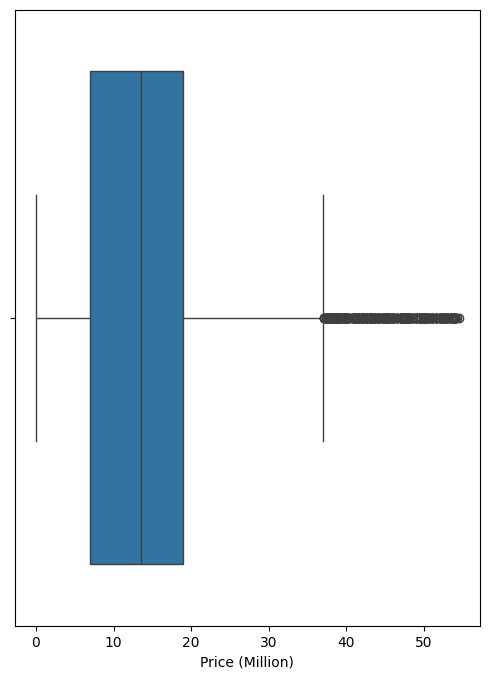

In [141]:
#After removing outliers in steps above - look for IQR above.
plt.figure(figsize = (6,8))
#fig,ax = plt.subplots(figsize=(28,7))
#Sales.loc[:,['Item_Outlet_Sales']].boxplot()
#plt.boxplot(Sales.Item_Outlet_Sales)
sns.boxplot(x= df_new['Price (Million)'])

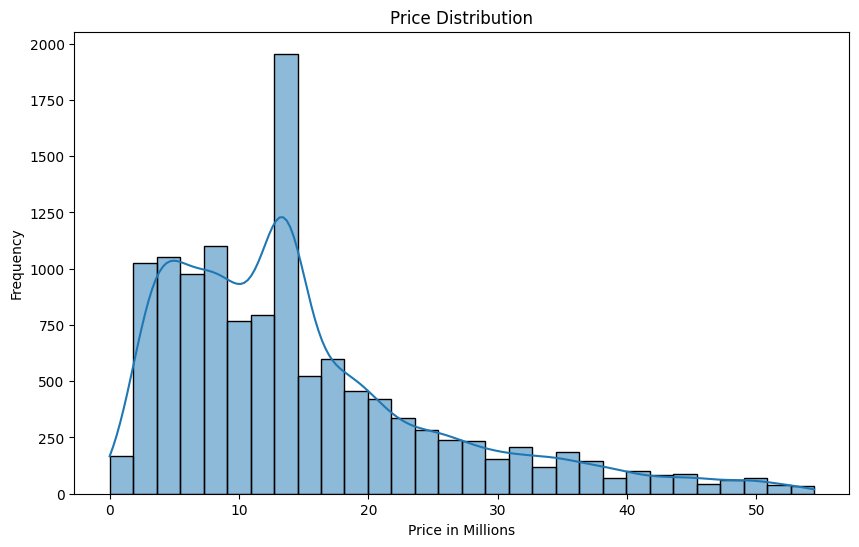

In [142]:
plt.figure(figsize=(10,6))
sns.histplot(df_new['Price (Million)'],bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price in Millions')
plt.ylabel('Frequency')
plt.show()

In [143]:
#before
df_dev_price=df_new[['Developer', 'Price (Million)']]

In [144]:
#before
avg_price_by_developer=df_dev_price.groupby('Developer')['Price (Million)'].mean().reset_index()
avg_price_by_developer

,Developer,Price (Million)
0,SHREE SAIBABA CONSTRUCTION COMPANY,8.389308
1,A and O Realty,20.474698
2,A&O Realty and Riddhi Siddhi Group,21.708055
3,ABHISHEK SHELTERS LTD.,37.500400
4,ACME GROUP INDIA,15.071235
...,...,...
928,Zire Rushi Construction,13.499910
929,Zojwala Group,4.000050
930,gopal builders,13.499910
931,shree jee construction,4.100400


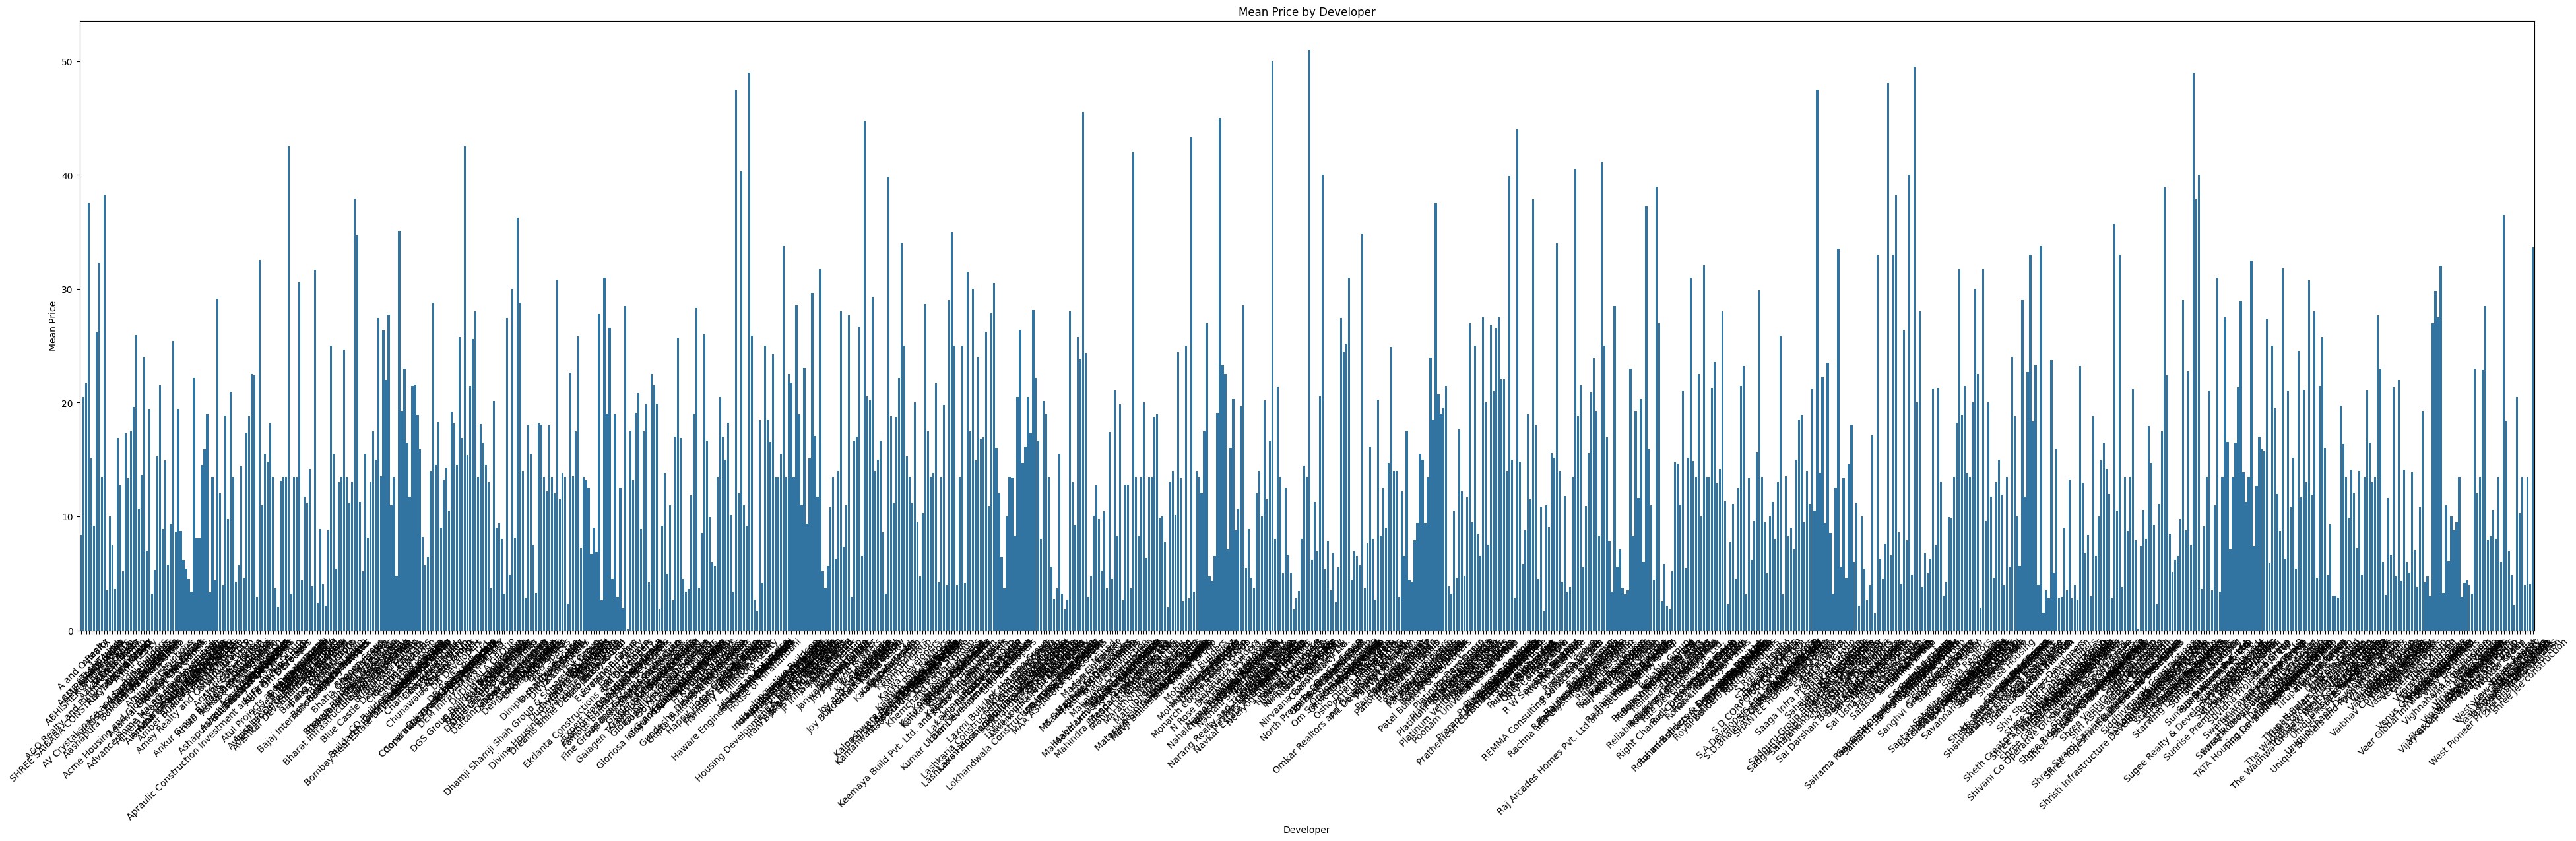

In [145]:
#before
plt.figure(figsize=(48,12))
sns.barplot(data=avg_price_by_developer, x='Developer', y='Price (Million)')
plt.title('Mean Price by Developer')
plt.xticks(rotation=45)
plt.ylabel('Mean Price')
plt.xlabel('Developer')
plt.show()

In [146]:
num_cols=df_new.select_dtypes(include=['float64','int64']).columns
cat_cols=df_new.select_dtypes(include=['object']).columns
#Seprated the df by Numerical and Categorical data types to late impute missing value of Median and Mode respect.
df_numerical=df_new[num_cols]
df_categorical = df_new[cat_cols]

In [147]:
df_numerical

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Floors,Power Back Up,Rain Water Harvesting,Club House,...,Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
0,5.0,1.0,3149600.0,635.000000,4960.0,375.000000,14.0,1,1,1,...,3.149600,0,90,0,0,0,0,0,0,0
1,20.0,10.0,6299520.0,579.000000,10880.0,579.000000,34.0,1,1,1,...,6.299520,0,90,1,0,0,0,0,0,0
2,18.0,0.0,5399200.0,850.000000,6352.0,585.000000,18.0,1,1,1,...,5.399200,0,90,1,0,0,0,0,0,0
3,5.0,70.0,8999550.0,1050.000000,8571.0,815.000000,27.0,1,1,1,...,8.999550,0,90,0,0,0,0,0,0,0
4,8.0,1.0,4950264.0,561.000000,8824.0,419.000000,26.0,1,1,1,...,4.950264,0,89,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12438,11.0,1.0,18709218.0,891.000000,20998.0,680.373103,11.0,0,0,0,...,18.709218,0,0,1,1,0,4,0,0,1
12439,10.0,20.0,30999904.0,1376.000000,22529.0,1076.000000,22.0,1,1,1,...,30.999904,1,90,0,0,0,0,0,0,1
12440,5.0,7.0,18499840.0,970.000000,19072.0,618.000000,22.0,1,1,1,...,18.499840,3,90,0,0,1,7,0,0,1
12441,1.0,0.0,22000000.0,1015.079329,22000000.0,821.000000,7.0,1,1,1,...,22.000000,0,90,1,0,1,8,1,0,1


In [148]:
df_aminities=df_new[['Power Back Up',
'Lift',
'Rain Water Harvesting',
'Club House',
'Swimming Pool',
'Gymnasium',
'Park',
'Security',
'Water Storage',
'Private Terrace/Garden',
'Vaastu Compliant',
'Service/Goods Lift',
'Air Conditioned',
'Visitor Parking',
'Intercom Facility',
'Maintenance Staff',
'Waste Disposal',
'Laundry Service',
'Internet/Wi-Fi Connectivity',
'DTH Television Facility',
'RO Water System',
'Banquet Hall',
'Bar/Lounge',
'Cafeteria/Food Court',
'Conference Room',
'Piped Gas',
'Jogging and Strolling Track',
'Outdoor Tennis Courts',
'Mansion',
'Downtown',
'Skyline View',
'Wrap Around Balcony',
'Island Kitchen Layout',
'Full Glass Wall',
'House help accommodation',
'Concierge Services',
'Garden View',
'Marble flooring',
'Well Furnished',
'Modular Kitchen',
'Helipad',
'Private pool',
'Private Jaccuzi',
'Mini Cinema Theatre',
'Golf Course',
'Infinity Swimming Pool',
'Pool with temperature control',
'Sea facing',
'Skydeck',
'Earth quake resistant',
'Theme based Architectures',
'Health club with Steam / Jaccuzi',
'Large Clubhouse',
'Large Open space',
'Fingerprint Access',
'Grand Entrance lobby',
'Private Garage',
'Fireplace',
'Wine Cellar',
'Sky Villa',
'Water Front',
'Hilltop',
'Smart Home',
'Barbeque space',
'Kids play area',
'Library',
'Puja Room',
'Study',
'Servant Room',
'Store',
'Aerobics Room',
'Canopy Walk',
'Coffee Lounge & Restaurants',
'Dance Studio',
'Event Space & Amphitheatre',
'Flower Gardens',
'Guest Accommodation',
'Indoor Squash & Badminton Courts',
'Kids Play Area',
'Kids Play Pool With Water Slides',
'Library And Business Centre',
'Meditation Area',
'Multipurpose Courts',
'Recreational Pool',
'Rentable Community Space',
'Retail Boulevard (Retail Shops)',
'Cycling & Jogging Track',
'Fire Fighting Equipment',
'Aesthetically designed landscape garden']]

In [149]:
df_aminities.dtypes

Power Back Up                               int64
Lift                                       object
Rain Water Harvesting                       int64
Club House                                  int64
Swimming Pool                               int64
                                            ...  
Rentable Community Space                    int64
Retail Boulevard (Retail Shops)             int64
Cycling & Jogging Track                     int64
Fire Fighting Equipment                     int64
Aesthetically designed landscape garden     int64
Length: 89, dtype: object

In [150]:
df_aminities=df_aminities.astype(object)
df_aminities.dtypes

Power Back Up                              object
Lift                                       object
Rain Water Harvesting                      object
Club House                                 object
Swimming Pool                              object
                                            ...  
Rentable Community Space                   object
Retail Boulevard (Retail Shops)            object
Cycling & Jogging Track                    object
Fire Fighting Equipment                    object
Aesthetically designed landscape garden    object
Length: 89, dtype: object

In [151]:
df_without_aminities=df_new.drop(columns=df_aminities)
df_without_aminities.info()
#Bathroom was still a float now convered to Object

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12442
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Possession Status          12330 non-null  object 
 1   Floor No                   12330 non-null  float64
 2   Developer                  12330 non-null  object 
 3   Units Available            12330 non-null  float64
 4   Price                      12330 non-null  float64
 5   Flooring Type              12330 non-null  object 
 6   Electricity Status         12330 non-null  object 
 7   Landmark                   12330 non-null  object 
 8   Covered Area               12330 non-null  float64
 9   Project Name               12330 non-null  object 
 10  Sqft Price                 12330 non-null  float64
 11  Carpet Area                12330 non-null  float64
 12  Area Name                  12330 non-null  object 
 13  Society                    12330 non-null  object 


In [152]:
df_new['Bathroom'] =df_new['Bathroom'].astype('object')
df_new.Bathroom.dtypes

dtype('O')

In [153]:
df_without_aminities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12442
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Possession Status          12330 non-null  object 
 1   Floor No                   12330 non-null  float64
 2   Developer                  12330 non-null  object 
 3   Units Available            12330 non-null  float64
 4   Price                      12330 non-null  float64
 5   Flooring Type              12330 non-null  object 
 6   Electricity Status         12330 non-null  object 
 7   Landmark                   12330 non-null  object 
 8   Covered Area               12330 non-null  float64
 9   Project Name               12330 non-null  object 
 10  Sqft Price                 12330 non-null  float64
 11  Carpet Area                12330 non-null  float64
 12  Area Name                  12330 non-null  object 
 13  Society                    12330 non-null  object 


In [154]:
df_new1=pd.concat([df_without_aminities,df_aminities],axis=1)
df_new1.shape

(12330, 130)

In [155]:
df_new1.head()

,Possession Status,Floor No,Developer,Units Available,Price,Flooring Type,Electricity Status,Landmark,Covered Area,Project Name,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
0,Under Construction,5.0,Unknown,1.0,3149600.0,Vitrified,No/Rare Powercut,Kalyan West Bapgaon,635.0,Unknown,...,1,1,1,1,1,1,1,1,1,1
1,Ready to Move,20.0,TATA Housing Development Company Ltd.,10.0,6299520.0,Vitrified,No/Rare Powercut,Rajoli naka,579.0,Tata Amantra,...,1,1,1,1,1,1,1,1,1,1
2,Ready to Move,18.0,Sai Satyam Developers,0.0,5399200.0,Vitrified,No/Rare Powercut,This property has reputed scholl ints vicinity.,850.0,Sai Satyam Homes,...,1,1,1,1,1,1,1,1,1,1
3,Under Construction,5.0,Birla Estates,70.0,8999550.0,Vitrified,No/Rare Powercut,Shahad is one of the attractive locations to o...,1050.0,Birla Vanya,...,1,1,1,1,1,1,1,1,1,1
4,Under Construction,8.0,Godrej Properties,1.0,4950264.0,Vitrified,No/Rare Powercut,majiwada metro station,561.0,Godrej Nirvaan,...,1,1,1,1,1,1,1,1,1,1


In [156]:
num_cols=df_new1.select_dtypes(include=['float64','int64']).columns
cat_cols=df_new1.select_dtypes(include=['object']).columns
#Seprated the df by Numerical and Categorical data types to late impute missing value of Median and Mode respect.
df_numerical=df_new1[num_cols]
df_categorical = df_new1[cat_cols]

In [157]:
df_numerical.describe()

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Floors,Area Difference (%),Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
count,12330.000000,12330.000000,1.233000e+04,12330.000000,1.233000e+04,12330.000000,12267.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,9.058881,4.683942,2.671532e+07,1036.549617,2.456908e+06,775.481491,17.835983,23.374213,14.890226,0.682157,51.852393,0.787105,0.489781,0.617843,2.111922,0.687186,0.086942,0.678183
std,8.989676,21.114416,3.693657e+08,730.251427,2.820175e+07,554.774274,14.419763,32.242564,10.760181,1.404123,42.112818,0.410360,0.499916,0.729508,2.319055,0.468011,0.455034,0.467192
min,-1.000000,0.000000,0.000000e+00,10.000000,0.000000e+00,2.000000,-1.000000,-2900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,6.999820e+06,600.000000,1.069425e+04,450.000000,7.000000,19.119622,6.999820,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,1.349991e+07,850.000000,1.750000e+04,649.065250,14.000000,23.639382,13.499907,0.000000,89.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,12.000000,2.000000,2.599911e+07,1200.000000,2.839675e+04,890.000000,24.000000,31.379723,19.000150,1.000000,90.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000
max,93.000000,750.000000,4.080000e+10,15006.000000,2.800000e+09,20870.000000,200.000000,99.875000,54.462784,7.000000,90.000000,2.000000,1.000000,3.000000,8.000000,4.000000,4.000000,1.000000


In [158]:
df_categorical.describe()

,Possession Status,Developer,Flooring Type,Electricity Status,Landmark,Project Name,Area Name,Society,Ownership Type,Furnished Type,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
count,12330,12330,12330,12330,12330,12330,12330,12330,9387,12330,...,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
unique,3,933,8,5,5408,2319,354,2,4,4,...,2,2,2,2,2,2,2,2,2,2
top,Ready to Move,Unknown,Vitrified,No/Rare Powercut,D Mart,Unknown,Dombivli East,Y,Freehold,Unfurnished,...,1,1,1,1,1,1,1,1,1,1
freq,9695,5634,8922,11024,1775,4489,652,6291,6652,6528,...,6801,6806,6843,6842,6794,6798,6812,6840,6889,6792


In [159]:
#Impute missing values - Numerical data by Median
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='median')
df_numerical_imputed=pd.DataFrame(num_imputer.fit_transform(df_numerical),columns=num_cols)
df_numerical_imputed

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Floors,Area Difference (%),Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
0,5.0,1.0,3149600.0,635.000000,4960.0,375.000000,14.0,40.944882,3.149600,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,10.0,6299520.0,579.000000,10880.0,579.000000,34.0,0.000000,6.299520,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,0.0,5399200.0,850.000000,6352.0,585.000000,18.0,31.176471,5.399200,0.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,70.0,8999550.0,1050.000000,8571.0,815.000000,27.0,22.380952,8.999550,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,1.0,4950264.0,561.000000,8824.0,419.000000,26.0,25.311943,4.950264,0.0,89.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,11.0,1.0,18709218.0,891.000000,20998.0,680.373103,11.0,23.639382,18.709218,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0
12326,10.0,20.0,30999904.0,1376.000000,22529.0,1076.000000,22.0,21.802326,30.999904,1.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12327,5.0,7.0,18499840.0,970.000000,19072.0,618.000000,22.0,36.288660,18.499840,3.0,90.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0
12328,1.0,0.0,22000000.0,1015.079329,22000000.0,821.000000,7.0,19.119622,22.000000,0.0,90.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0


In [160]:
#Impute missings values for Catagorical
# Instead of imputing Developer by MODE, Project vise imputation and repalcments done above already
cat_imputer=SimpleImputer(strategy='most_frequent')
df_categorical_imputed = pd.DataFrame(cat_imputer.fit_transform(df_categorical),columns=cat_cols)

In [161]:
df_cleansed=pd.concat([df_categorical_imputed,df_numerical_imputed],axis=1)
df_cleansed.isnull().sum()

Possession Status           0
Developer                   0
Flooring Type               0
Electricity Status          0
Landmark                    0
                           ..
Furnished_Type_Encoded      0
Facing_Encoded              0
Transaction_Type_Encoded    0
Type_of_Property_Encoded    0
City_Encoded                0
Length: 130, dtype: int64

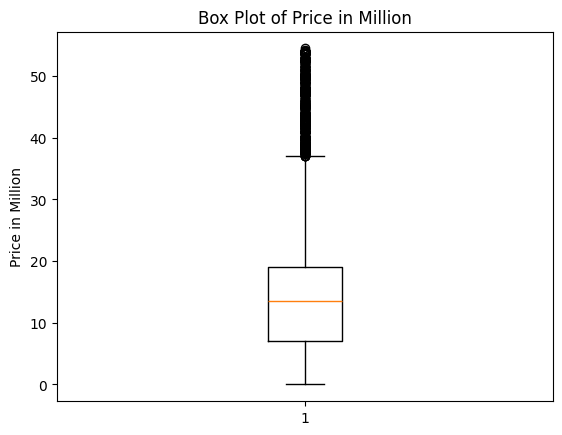

In [162]:
#After cleaning replacing outliers via median

plt.boxplot(df_cleansed['Price (Million)'])
plt.title('Box Plot of Price in Million')
plt.ylabel('Price in Million')
plt.show()

<Axes: >

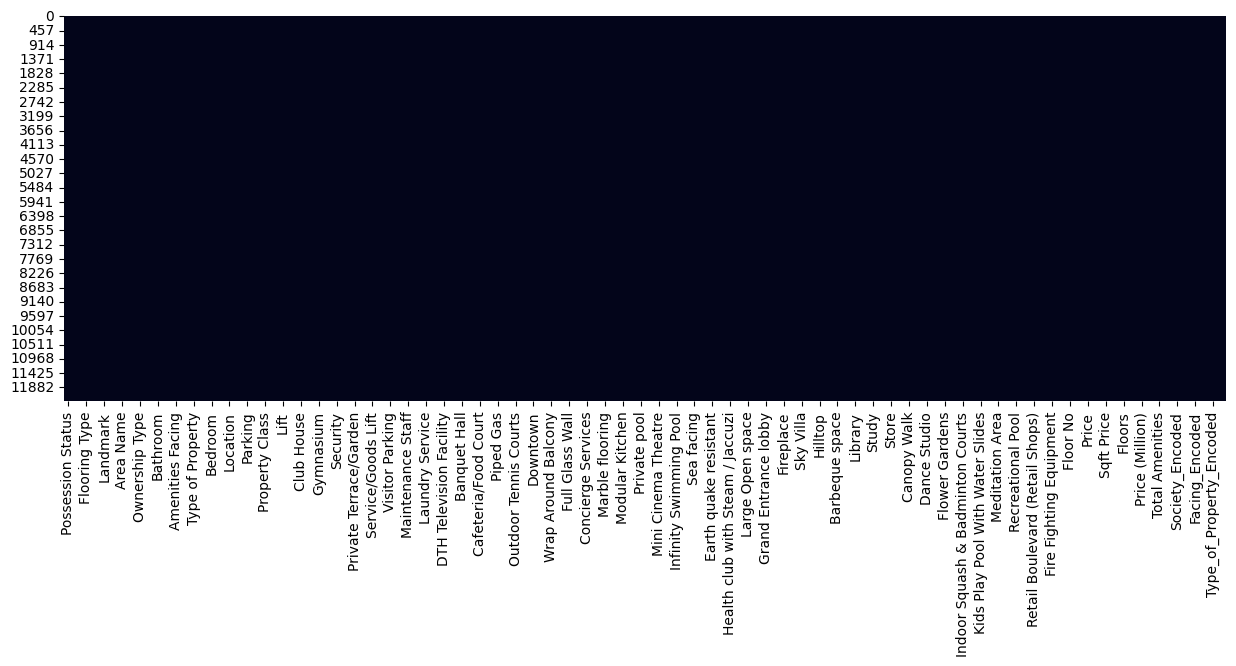

In [163]:
# Heat Map Visualization after cleansing
plt.figure(figsize =(15,5))
sns.heatmap(df_cleansed.isnull(), cbar = False)

<Axes: xlabel='Balconies', ylabel='Price (Million)'>

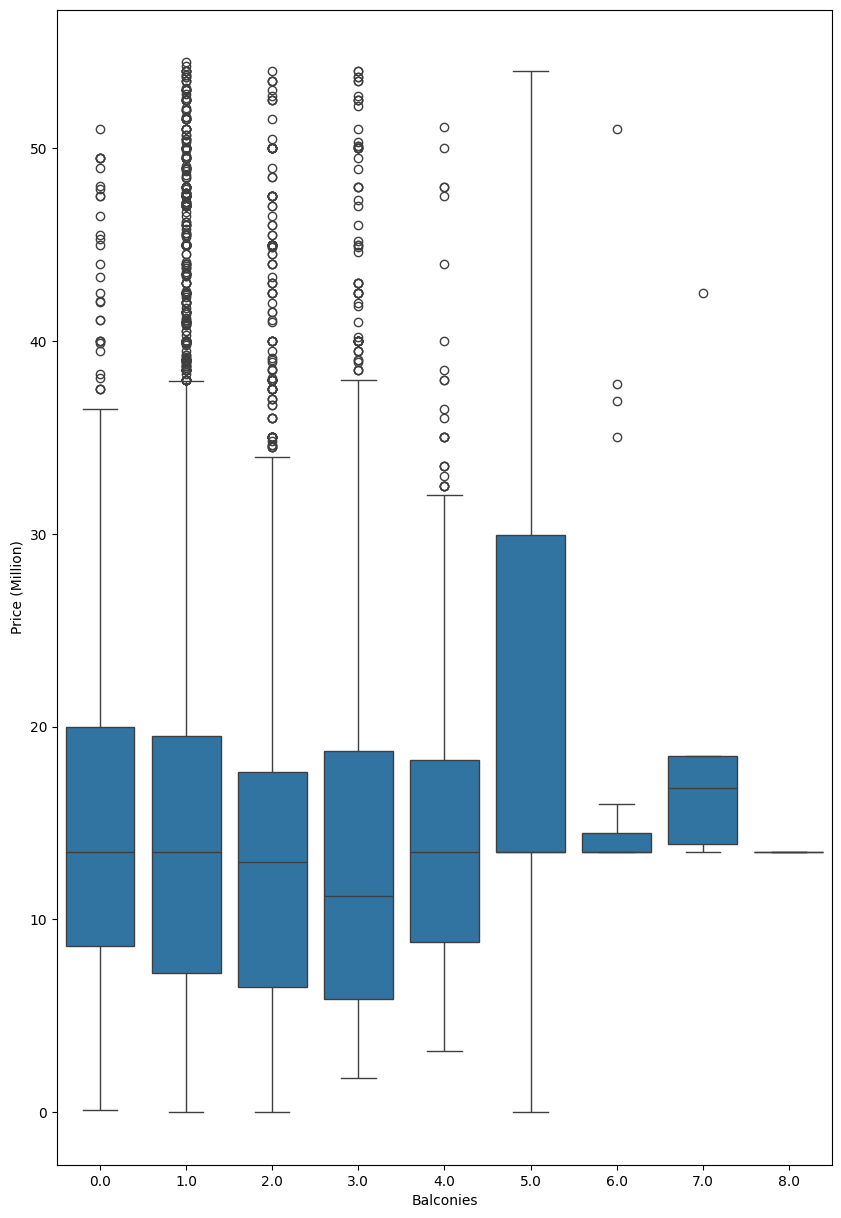

In [164]:
#after removing outlier puting median as strategy of imputation
plt.figure(figsize = (10,15))
sns.boxplot(x= df_cleansed['Balconies'], y =df_cleansed['Price (Million)'])

<Axes: xlabel='Bedroom', ylabel='Price (Million)'>

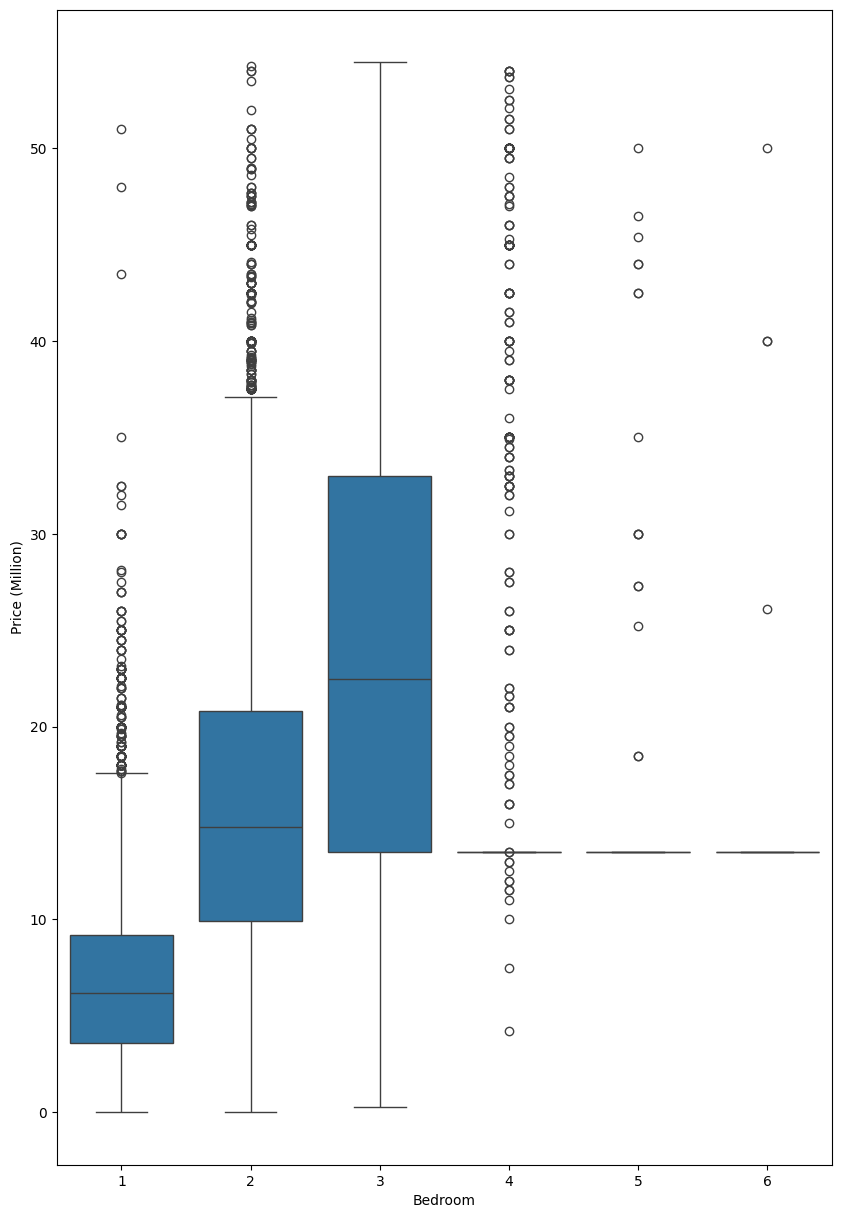

In [165]:
#After removing outlier puting median as strategy of imputation
plt.figure(figsize = (10,15))
sns.boxplot(x= df_cleansed['Bedroom'], y =df_cleansed['Price (Million)'])

<Axes: xlabel='Bathroom', ylabel='Price (Million)'>

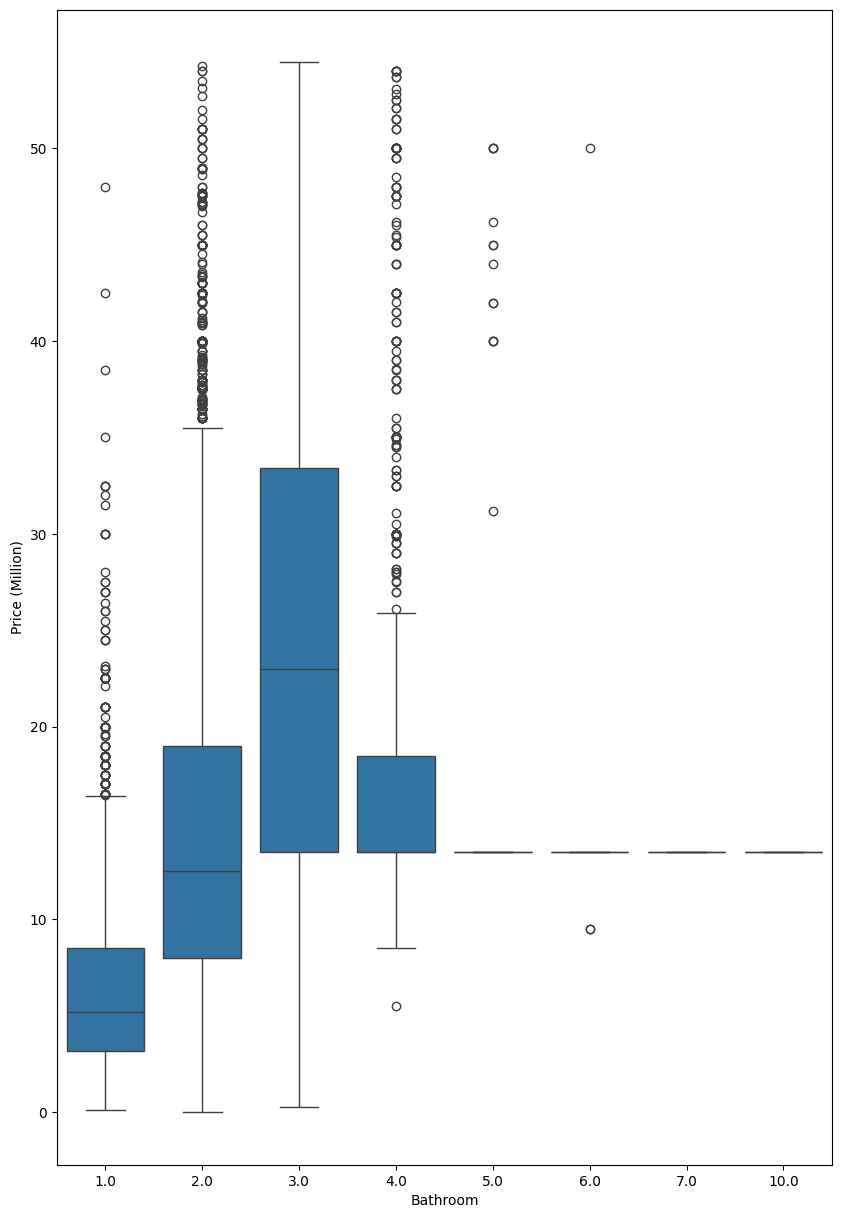

In [166]:
#After removing outlier puting median as strategy of imputation
plt.figure(figsize = (10,15))
sns.boxplot(x= df_cleansed['Bathroom'], y =df_cleansed['Price (Million)'])

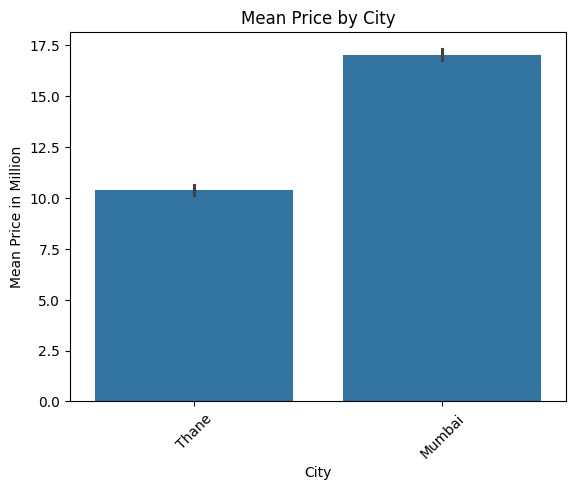

In [167]:
#after
sns.barplot(data=df_cleansed, x=df_cleansed['City'], y=df_cleansed['Price (Million)'])
plt.title('Mean Price by City')
plt.xticks(rotation=45)
plt.ylabel('Mean Price in Million')
plt.xlabel('City')
plt.show()

In [168]:
df_cleansed_obj=df_cleansed.select_dtypes(include=object)
df_cleansed_obj.mode()


,Possession Status,Developer,Flooring Type,Electricity Status,Landmark,Project Name,Area Name,Society,Ownership Type,Furnished Type,...,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable Community Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden
0,Ready to Move,Unknown,Vitrified,No/Rare Powercut,D Mart,Unknown,Dombivli East,Y,Freehold,Unfurnished,...,1,1,1,1,1,1,1,1,1,1


In [169]:
df_cleansed_float=df_cleansed.select_dtypes(include=float)
df_cleansed_float.mode()

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Floors,Area Difference (%),Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
0,3.0,0.0,12000000.0,650.0,20000.0,450.0,7.0,0.0,13.49991,0.0,90.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [170]:
# Calculate the correlation matrix
df_cleansed_cor=df_cleansed_float.corr()
df_cleansed_cor

,Floor No,Units Available,Price,Covered Area,Sqft Price,Carpet Area,Floors,Area Difference (%),Price (Million),Flooring_Type_Encoded,Total Amenities,Possession_Status_Encoded,Society_Encoded,Furnished_Type_Encoded,Facing_Encoded,Transaction_Type_Encoded,Type_of_Property_Encoded,City_Encoded
Floor No,1.000000,0.111488,0.045837,0.328199,0.058571,0.320843,0.747935,0.021560,0.167152,0.067417,0.293475,-0.273218,-0.191826,-0.090318,-0.157858,-0.302477,-0.113341,0.064419
Units Available,0.111488,1.000000,-0.003771,-0.015337,-0.007522,-0.015113,0.187935,0.010677,-0.017589,0.007949,0.152069,-0.294732,-0.118254,-0.082269,-0.095276,-0.253192,-0.036294,-0.011060
Price,0.045837,-0.003771,1.000000,0.066786,0.081493,0.064571,0.040168,0.003609,0.024995,0.011146,0.027896,0.001892,-0.026377,-0.001583,-0.011131,-0.021326,0.002939,0.029599
Covered Area,0.328199,-0.015337,0.066786,1.000000,0.084211,0.877938,0.350743,0.079780,0.334529,0.167087,0.286112,0.005037,-0.178134,0.057836,-0.060038,-0.080857,0.113606,0.160644
Sqft Price,0.058571,-0.007522,0.081493,0.084211,1.000000,0.099429,0.036431,-0.011424,0.027008,0.007603,-0.001593,-0.027865,-0.024222,-0.011329,0.011517,-0.017217,0.019523,0.035312
Carpet Area,0.320843,-0.015113,0.064571,0.877938,0.099429,1.000000,0.337889,-0.104714,0.320926,0.168947,0.253233,0.014125,-0.153324,0.072388,-0.042759,-0.066886,0.116227,0.156790
Floors,0.747935,0.187935,0.040168,0.350743,0.036431,0.337889,1.000000,0.032471,0.197213,0.080356,0.387554,-0.394073,-0.259497,-0.127443,-0.193683,-0.392012,-0.151617,0.058368
Area Difference (%),0.021560,0.010677,0.003609,0.079780,-0.011424,-0.104714,0.032471,1.000000,0.009875,-0.024080,0.047536,-0.026159,-0.022616,-0.013573,-0.043883,-0.023861,-0.027510,0.001653
Price (Million),0.167152,-0.017589,0.024995,0.334529,0.027008,0.320926,0.197213,0.009875,1.000000,0.115309,0.227428,-0.020761,-0.164375,0.090800,-0.064988,-0.076107,-0.032268,0.288670
Flooring_Type_Encoded,0.067417,0.007949,0.011146,0.167087,0.007603,0.168947,0.080356,-0.024080,0.115309,1.000000,0.198344,-0.009901,-0.064887,0.042548,-0.054186,-0.039363,0.003520,0.070329


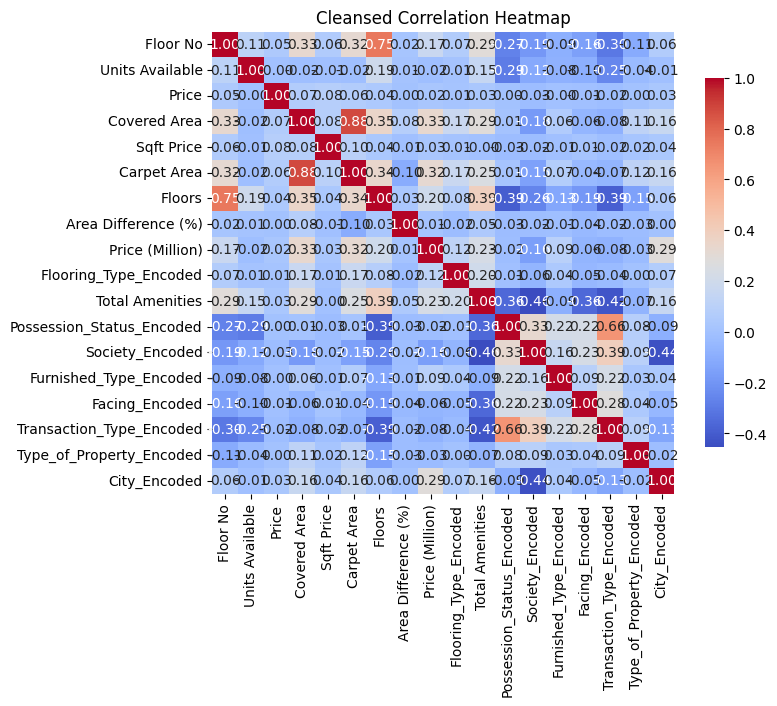

In [171]:

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Create a heatmap with annotations
sns.heatmap(df_cleansed_cor, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Set the title
plt.title('Cleansed Correlation Heatmap')
# Show the plot
plt.show()

In [172]:
# Specify the file path
base_path = os.getcwd()  # Current file directory
output_folder = os.path.join(base_path, 'artifacts')

output_file = os.path.join(output_folder, "Property_Cleansed.xlsx")
df_cleansed.to_excel(output_file,index=True, engine='openpyxl')
print(f'Dataframe exported successfully to {output_file}')

Dataframe exported successfully to D:\Crio_Projects\RealEstate_PricePrediction\mlproject\artifacts\Property_Cleansed.xlsx
